# Машинное обучение, ФКН ВШЭ

## Практическое задание 3. Градиентный спуск своими руками

### Общая информация
Дата выдачи: **23.10.2023**

Мягкий дедлайн: **08.11.23 23:59**

Жесткий дедлайн: **12.11.23 23:59**

### О задании

В данном задании необходимо реализовать обучение линейной регрессии с помощью различных вариантов градиентного спуска.


### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов + 2 балла бонус.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.
Также оценка может быть снижена за плохо читаемый код и плохо считываемые диаграммы.

Все ответы должны сопровождаться кодом или комментариями о том, как они были получены.


### Формат сдачи
Задания сдаются через систему Anytask. Инвайт можно найти на странице курса. Присылать необходимо ноутбук с выполненным заданием. Сам ноутбук называйте в формате homework-practice-03-gd-Username.ipynb, где Username — ваша фамилия.

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже.

**Оценка**: ...

Напомним, что на лекциях и семинарах мы разбирали некоторые подходы к оптимизации функционалов по параметрам. В частности, был рассмотрен градиентный спуск и различные подходы к его реализации — полный градиентный спуск, стохастический градиентный спуск, метод импульса и другие. В качестве модели у нас будет выступать линейная регрессия.

В этом домашнем задании вам предстоит реализовать 4 различных вариации градиентного спуска, написать свою реализацию линейной регресии, сравнить методы градиентного спуска между собой на реальных данных и ещё много чего веселого и интересного!

## Задание 1. Реализация градиентного спуска (3.5 балла)

В этом задании вам предстоит написать собственные реализации различных подходов к градиентному спуску с опорой на подготовленные шаблоны в файле `descents.py`.

**Все реализуемые методы должны быть векторизованы!**

### Лирическое-теоретическое отступление № 1

Основное свойство антиградиента &ndash; он указывает в сторону наискорейшего убывания функции в данной точке. Соответственно, будет логично стартовать из некоторой точки, сдвинуться в сторону антиградиента,
пересчитать антиградиент и снова сдвинуться в его сторону и т.д. Запишем это более формально.

Пусть $w_0$ &ndash; начальный набор параметров (например, нулевой или сгенерированный из некоторого
случайного распределения). Тогда ванильный градиентный спуск состоит в повторении следующих шагов до сходимости:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

### Лирическое-теоретическое отступление № 2

На семинаре про [матрично-векторное дифференцирование](https://github.com/esokolov/ml-course-hse/blob/master/2022-fall/seminars/sem03-vector-diff.pdf) вы должны были обсуждать дифференцирование функции потерь MSE в матричном виде.

### Задание 1.0. Градиент MSE в матричном виде (0 баллов).

Напомним, что функция потерь MSE записывается в матричном виде как:

$$
    Q(w) = \dfrac{1}{\ell} \left( y - Xw \right)^T \left( y - Xw \right)
$$

Выпишите ниже (подсмотрев в семинар или решив самостоятельно) градиент для функции потерь MSE в матричном виде.

**Решение:**

- $Q(w) = \dfrac{1}{\ell} \left( y - Xw \right)^T \left( y - Xw \right) = \dfrac{1}{\ell} \langle y - Xw, y - Xw \rangle$

- $D_w Q(w) = \dfrac{1}{\ell} D_w \left( \langle y - Xw, y - Xw \rangle \right) = \dfrac{1}{\ell} \left( \langle -X \ dw, y - Xw \rangle + \langle y - Xw,  -X \ dw \rangle \right) = \\ = \dfrac{1}{\ell} \left( \langle -X \ dw, y - Xw \rangle + \langle -X \ dw, y - Xw \rangle \right) = - \dfrac{2}{\ell} \langle X \ dw, y - Xw \rangle = - \dfrac{2}{\ell} \langle dw, X^Ty - X^TXw \rangle = \\ = \langle dw, \dfrac{2}{\ell} \left( X^TXw - X^Ty \right) \rangle$

- Из пункта выше следует, что $\nabla_w Q(w) = \dfrac{2}{\ell} \left( X^TXw - X^Ty \right) = \dfrac{2}{\ell} X^T \left( Xw - y \right)$.

### Задание 1.1. Родительский класс BaseDescent (0.5 балла).

Реализуйте функции `calc_loss` (вычисление MSE для переданных $x$ и $y$) и `predict` (предсказание $y_{pred}$ для переданных $x$) в классе `BaseDescent`.

Все вычисления должны быть векторизованы.

### Задание 1.2. Полный градиентный спуск VanillaGradientDescent (0.5 балла).

Реализуйте полный градиентный спуск заполнив пропуски в классе `VanillaGradientDescent` в файле `descents.py`. Для вычисления градиента используйте формулу выше. Шаг оптимизации:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

Здесь и далее функция `update_weights` должна возвращать разницу между $w_{k + 1}$ и $w_{k}$: $\quad w_{k + 1} - w_{k} = -\eta_{k} \nabla_{w} Q(w_{k})$.

Во всех методах градиентного спуска мы будем использовать следующую формулу для длины шага:

$$
    \eta_{k} = \lambda \left(\dfrac{s_0}{s_0 + k}\right)^p
$$

На практике достаточно настроить параметр $\lambda$, а остальным выставить параметры по умолчанию: $s_0 = 1, \, p = 0.5.$

### Лирическое-теоретическое отступление № 3

Как правило, в задачах машинного обучения функционал $Q(w)$ представим в виде суммы $\ell$ функций:

$$
    Q(w)
    =
    \frac{1}{\ell}
    \sum_{i = 1}^{\ell}
        q_i(w).
$$

В нашем домашнем задании отдельные функции $q_i(w)$ соответствуют ошибкам на отдельных объектах.

Проблема метода градиентного спуска состоит в том, что на каждом шаге необходимо вычислять градиент всей суммы (будем его называть полным градиентом):

$$
    \nabla_w Q(w)
    =
    \frac{1}{\ell}
    \sum_{i = 1}^{\ell}
        \nabla_w q_i(w).
$$

Это может быть очень трудоёмко при больших размерах выборки. В то же время точное вычисление градиента может быть не так уж необходимо &ndash; как правило, мы делаем не очень большие шаги в сторону антиградиента, и наличие в нём неточностей не должно сильно сказаться на общей траектории.

Оценить градиент суммы функций можно средним градиентов случайно взятого подмножества функций:

$$
    \nabla_{w} Q(w_{k}) \approx \dfrac{1}{|B|}\sum\limits_{i \in B}\nabla_{w} q_{i}(w_{k}),
$$
где $B$ - это случайно выбранное подмножество индексов.

В этом случае мы получим метод **стохастического градиентного спуска**.

### Задание 1.3. Стохастический градиентный спуск StochasticDescent (0.5 балла).

Реализуйте стохастический градиентный спуск заполнив пропуски в классе `StochasticDescent`. Для оценки градиента используйте формулу выше (среднее градиентов случайно выбранного батча объектов). Шаг оптимизации:

$$
    w_{k + 1} = w_{k} - \eta_{k} \dfrac{1}{|B|}\sum\limits_{i \in B}\nabla_{w} q_{i}(w_{k}).
$$

Размер батча будет являться гиперпараметром метода, семплируйте индексы для батча объектов с помощью `np.random.randint`.

### Лирическое-теоретическое отступление № 4

Может оказаться, что направление антиградиента сильно меняется от шага к шагу. Например, если линии уровня функционала сильно вытянуты, то из-за ортогональности градиента линиям уровня он будет менять направление на почти противоположное на каждом шаге. Такие осцилляции будут вносить сильный шум в движение, и процесс оптимизации займёт много итераций. Чтобы избежать этого, можно усреднять векторы антиградиента с нескольких предыдущих шагов &ndash; в этом случае шум уменьшится, и такой средний вектор будет указывать в сторону общего направления движения. Введём для этого вектор инерции:

\begin{align}
    &h_0 = 0, \\
    &h_{k + 1} = \alpha h_{k} + \eta_k \nabla_w Q(w_{k})
\end{align}

Здесь $\alpha$ &ndash; параметр метода, определяющей скорость затухания градиентов с предыдущих шагов. Разумеется, вместо вектора градиента может быть использована его аппроксимация. Чтобы сделать шаг градиентного спуска, просто сдвинем предыдущую точку на вектор инерции:

$$
    w_{k + 1} = w_{k} - h_{k + 1}.
$$

Заметим, что если по какой-то координате градиент постоянно меняет знак, то в результате усреднения градиентов в векторе инерции эта координата окажется близкой к нулю. Если же по координате знак градиента всегда одинаковый, то величина соответствующей координаты в векторе инерции будет большой, и мы будем делать большие шаги в соответствующем направлении.

### Задание 1.4 Метод Momentum MomentumDescent (0.5 балла).

Реализуйте градиентный спуск с методом инерции заполнив пропуски в классе `MomentumDescent`. Шаг оптимизации:

\begin{align}
    &h_0 = 0, \\
    &h_{k + 1} = \alpha h_{k} + \eta_k \nabla_w Q(w_{k}) \\
    &w_{k + 1} = w_{k} - h_{k + 1}.
\end{align}

$\alpha$ будет являться гиперпараметром метода, но в данном домашнем задании мы зафиксируем её за вас $\alpha = 0.9$.

### Лирическое-теоретическое отступление № 5

Градиентный спуск очень чувствителен к выбору длины шага. Если шаг большой, то есть риск, что мы будем перескакивать через точку минимума; если же шаг маленький, то для нахождения минимума потребуется много итераций. При этом нет способов заранее определить правильный размер шага &ndash; к тому же, схемы с постепенным уменьшением шага по мере итераций могут тоже плохо работать.

В методе AdaGrad предлагается сделать свою длину шага для каждой компоненты вектора параметров. При этом шаг будет тем меньше, чем более длинные шаги мы делали на предыдущих итерациях:

\begin{align}
    &G_{kj} = G_{k-1,j} + (\nabla_w Q(w_{k - 1}))_j^2; \\
    &w_{jk} = w_{j,k-1} - \frac{\eta_t}{\sqrt{G_{kj}} + \varepsilon} (\nabla_w Q(w_{k - 1}))_j.
\end{align}

Здесь $\varepsilon$ небольшая константа, которая предотвращает деление на ноль.

В данном методе можно зафксировать длину шага (например, $\eta_k = 0.01$) и не подбирать её в процессе обучения. Отметим, что данный метод подходит для разреженных задач, в которых у каждого объекта большинство признаков равны нулю. Для признаков, у которых ненулевые значения встречаются редко, будут делаться большие шаги; если же какой-то признак часто является ненулевым, то шаги по нему будут небольшими.

У метода AdaGrad есть большой недостаток: переменная $G_{kj}$ монотонно растёт, из-за чего шаги становятся всё медленнее и могут остановиться ещё до того, как достигнут минимум функционала. Проблема решается в методе RMSprop, где используется экспоненциальное затухание градиентов:

$$
    G_{kj} = \alpha G_{k-1,j} + (1 - \alpha) (\nabla_w Q(w^{(k-1)}))_j^2.
$$

В этом случае размер шага по координате зависит в основном от того, насколько
быстро мы двигались по ней на последних итерациях.

Можно объединить идеи описанных выше методов: накапливать градиенты со всех прошлых шагов для
избежания осцилляций и делать адаптивную длину шага по каждому параметру.

### Задание 1.5. Метод Adam (Adaptive Moment Estimation) (1.5 балла).

![](adam_meme.png)

Реализуйте градиентный спуск с методом Adam заполнив пропуски в классе `Adam`. Шаг оптимизации:

\begin{align}
    &m_0 = 0, \quad v_0 = 0; \\ \\
    &m_{k + 1} = \beta_1 m_k + (1 - \beta_1) \nabla_w Q(w_{k}); \\ \\
    &v_{k + 1} = \beta_2 v_k + (1 - \beta_2) \left(\nabla_w Q(w_{k})\right)^2; \\ \\
    &\widehat{m}_{k} = \dfrac{m_k}{1 - \beta_1^{k}}, \quad \widehat{v}_{k} = \dfrac{v_k}{1 - \beta_2^{k}}; \\ \\
    &w_{k + 1} = w_{k} - \dfrac{\eta_k}{\sqrt{\widehat{v}_{k + 1}} + \varepsilon} \widehat{m}_{k + 1}.
\end{align}

$\beta_1 = 0.9, \beta_2 = 0.999$ и $\varepsilon = 10^{-8}$ будут зафиксированы за вас.

## Задание 2. Реализация линейной регресии (0.5 балла)

В этом задании вам предстоит написать свою реализацию линейной регресии, обучаемой с использованием градиентного спуска, с опорой на подготовленные шаблоны в файле `linear_regression.py` - **LinearRegression**. По сути линейная регрессия будет оберткой, которая запускает обучение 

Необходимо соблюдать следующие условия:

* Все вычисления должны быть векторизованы;
* Циклы средствами python допускаются только для итераций градиентного спуска;
* В качестве критерия останова необходимо использовать (одновременно):
    * Квадрат евклидовой нормы разности весов на двух соседних итерациях меньше `tolerance`;
    * Разность весов содержит наны;
    * Достижение максимального числа итераций `max_iter`.
* Будем считать, что все данные, которые поступают на вход имеют столбец единичек последним столбцом;
* Чтобы проследить за сходимостью оптимизационного процесса будем использовать `loss_history`, в нём будем хранить значения функции потерь до каждого шага, начиная с нулевого (до первого шага по антиградиенту) и значение функции потерь после оптимизации.

## Задание 3. Проверка кода (0 баллов)

In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

import numpy as np

from descents import get_descent
from linear_regression import LinearRegression

In [3]:
num_objects = 100
dimension = 5

x = np.random.rand(num_objects, dimension)
y = np.random.rand(num_objects)

In [4]:
# Descents

descent_config = {
    'descent_name': 'some name that we will replace in the future',
    'kwargs': {
        'dimension': dimension
    }
}

for descent_name in ['full', 'stochastic', 'momentum', 'adam']:
    descent_config['descent_name'] = descent_name
    descent = get_descent(descent_config)

    diff = descent.step(x, y)
    gradient = descent.calc_gradient(x, y)
    predictions = descent.predict(x)

    assert gradient.shape[0] == dimension, f'Gradient failed for descent {descent_name}'
    assert diff.shape[0] == dimension, f'Weights failed for descent {descent_name}'
    assert predictions.shape == y.shape, f'Prediction failed for descent {descent_name}'

In [5]:
# LinearRegression

max_iter = 10
tolerance = 0

descent_config = {
    'descent_name': 'stochastic',
    'kwargs': {
        'dimension': dimension,
        'batch_size': 10
    }
}

regression = LinearRegression(
    descent_config=descent_config,
    tolerance=tolerance,
    max_iter=max_iter
)

regression.fit(x, y)

assert len(regression.loss_history) == max_iter + 1, 'Loss history failed'

Если ваше решение прошло все тесты локально, то теперь пришло время протестировать его в [Яндекс Контесте](https://contest.yandex.ru/contest/54610/).

Для каждой задачи из контеста вставьте ссылку на успешную посылку:

* **VanillaGradientDescent**:


* **StochasticDescent**:


* **MomentumDescent**:


* **Adam**:


* **LinearRegression**:

## Задание 4. Работа с данными (1 балл)

Мы будем использовать датасет объявлений по продаже машин на немецком Ebay. В задаче предсказания целевой переменной для нас будет являться цена.

* Постройте график распределения целевой переменной в данных, подумайте, нужно ли заменить её на логарифм. Присутствуют ли выбросы в данных с аномальной ценой? Если да, то удалите их из данных.

* Проведите исследование данных:
    * Проанализируйте тип столбцов, постройте графики зависимости целевой переменной от признака, распределения значений признака;
    * Подумайте, какие признаки могут быть полезными на основе этих графиков, обработайте выбросы;
    * Подумайте, какие трансформации признаков из известных вам будет уместно применить;
    * Разделите полезные признаки на категориальные, вещественные и те, которые не надо предобрабатывать.
* Разделите данные на обучающую, валидационную и тестовую выборки в отношении 8:1:1.

In [6]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from descents import get_descent
from linear_regression import LinearRegression

sns.set(style='darkgrid')

In [7]:
data = pd.read_csv('autos.csv')

In [14]:
data.head()

,brand,model,vehicleType,gearbox,fuelType,notRepairedDamage,powerPS,kilometer,autoAgeMonths,price
0,volkswagen,golf,kleinwagen,manuell,benzin,nein,75,150000,177,1500
1,skoda,fabia,kleinwagen,manuell,diesel,nein,69,90000,93,3600
2,bmw,3er,limousine,manuell,benzin,ja,102,150000,246,650
3,peugeot,2_reihe,cabrio,manuell,benzin,nein,109,150000,140,2200
4,mazda,3_reihe,limousine,manuell,benzin,nein,105,150000,136,2000


In [16]:
data.shape

(241190, 10)

In [17]:
data.describe()

,powerPS,kilometer,autoAgeMonths,price
count,241190.000000,241190.000000,241190.000000,241190.000000
mean,131.271628,123766.677723,144.768676,6887.741892
std,60.622613,39825.955933,73.092598,8024.451993
min,51.000000,5000.000000,1.000000,1.000000
25%,90.000000,100000.000000,92.000000,1750.000000
50%,120.000000,150000.000000,140.000000,4100.000000
75%,160.000000,150000.000000,192.000000,8999.000000
max,589.000000,150000.000000,600.000000,99999.000000


In [18]:
data.dtypes

brand                object
model                object
vehicleType          object
gearbox              object
fuelType             object
notRepairedDamage    object
powerPS               int64
kilometer             int64
autoAgeMonths         int64
price                 int64
dtype: object

In [19]:
data.isna().any()

brand                False
model                False
vehicleType          False
gearbox              False
fuelType             False
notRepairedDamage    False
powerPS              False
kilometer            False
autoAgeMonths        False
price                False
dtype: bool

Датасет без nan 0_0

Колонки в данных:

* `brand` - название бренда автомобиля
* `model` - название модели автомобиля
* `vehicleType` - тип транспортного средства
* `gearbox` - тип трансмисcии
* `fuelType` - какой вид топлива использует автомобиль
* `notRepairedDamage` - есть ли в автомобиле неисправность, которая еще не устранена
* `powerPS` - мощность автомобиля в PS (метрическая лошадиная сила)
* `kilometer` - сколько километров проехал автомобиль, пробег
* `autoAgeMonths` - возраст автомобиля в месяцах


* `price` - цена, указанная в объявлении о продаже автомобиля (целевая переменная)

In [9]:
df_price = pd.DataFrame(data=pd.unique(data["price"]), columns=["price"])
df_price.sort_values(by="price", inplace = True)
df_price.reset_index(drop=True, inplace= True)

In [10]:
df_price

,price
0,1
1,2
2,3
3,5
4,9
...,...
4914,99500
4915,99900
4916,99911
4917,99990


In [11]:
df_price.describe()

,price
count,4919.000000
mean,17617.206546
std,18575.441930
min,1.000000
25%,4105.500000
50%,11270.000000
75%,24719.500000
max,99999.000000


In [12]:
df_price.head(20)

,price
0,1
1,2
2,3
3,5
4,9
5,10
6,11
7,13
8,15
9,20


In [13]:
df_price.tail(20)

,price
4899,92900
4900,92991
4901,93000
4902,93490
4903,93900
4904,93911
4905,94900
4906,94991
4907,94999
4908,95000


**Выводы:**
- Предполагаем, что 1 у.е. соответствует 1 EUR, так как по условию мы смотрим немецкий сегмент Ebay, а машины в датасете (судя по беглому взгляду на значения признаков) достаточно современные + среднее по значениям $\approx 17000 \ \text{у.е.}$

- Судя по первым 20 и последним 20 строкам значения целевой переменной, нет такого, чтобы какие-то значения слишком отличались друг от друга или слишком сильно отстояли от среднего, чтобы считать их за выбросы.

- Из соображений здравого смысла и специфики Ebay, торговля на котором работает по модели аукциона, уберём все предложения с явно номинальной начальной ценой. Будем считать, что минимальная цена на реальный автомобиль составляет $500$ EUR => все цены ниже $500$ EUR - номинальные => уберём их и соответствующие им предложения из датасета.  

In [14]:
threshold = 500
data = data.loc[data["price"] >= threshold, :].reset_index(drop=True)

In [15]:
data

,brand,model,vehicleType,gearbox,fuelType,notRepairedDamage,powerPS,kilometer,autoAgeMonths,price
0,volkswagen,golf,kleinwagen,manuell,benzin,nein,75,150000,177,1500
1,skoda,fabia,kleinwagen,manuell,diesel,nein,69,90000,93,3600
2,bmw,3er,limousine,manuell,benzin,ja,102,150000,246,650
3,peugeot,2_reihe,cabrio,manuell,benzin,nein,109,150000,140,2200
4,mazda,3_reihe,limousine,manuell,benzin,nein,105,150000,136,2000
...,...,...,...,...,...,...,...,...,...,...
234170,volkswagen,golf,limousine,manuell,diesel,nein,140,150000,69,7900
234171,seat,leon,limousine,manuell,benzin,ja,225,150000,142,3200
234172,smart,fortwo,cabrio,automatik,benzin,nein,101,125000,192,1199
234173,volkswagen,transporter,bus,manuell,diesel,nein,102,150000,241,9200


Рассмотрим распределение целевой переменной `data['price']` (без выбросов):

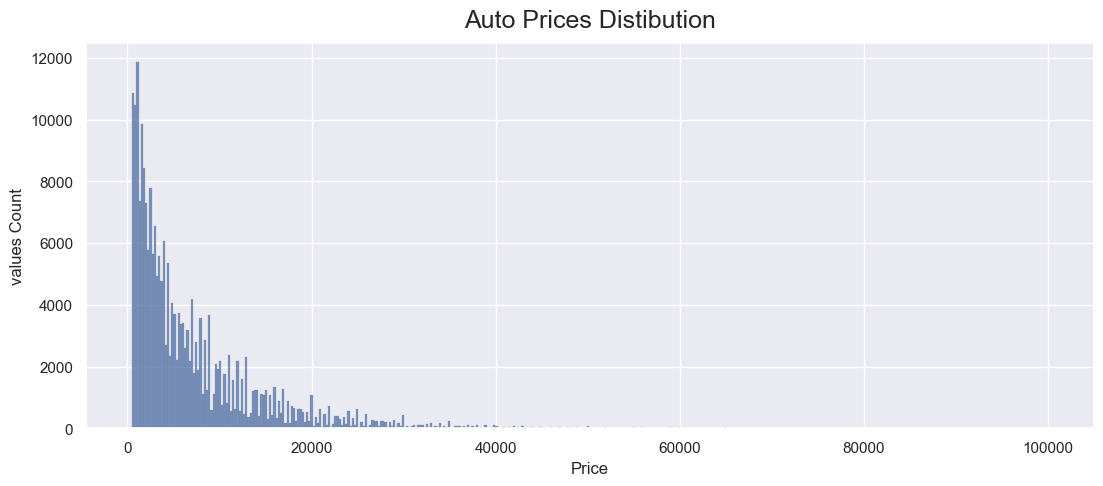

In [19]:
fig = plt.figure(figsize=[13,5])
ax =fig.add_subplot(111)

data_x = data['price']
sns.histplot(x=data_x, edgecolor = ".5")

ax.set_xlabel("Price", fontsize = 12)
ax.set_ylabel("values Count", fontsize = 12)
ax.set_title("Auto Prices Distibution",loc='center', fontsize = 18, y = 1.02)

plt.show()

У распределения очень длинный хвост.

Рассмотрим теперь распределение логарифма целевой переменной `data['price']` без выбросов (можем использовать именно натуральный логарифм, а не `np.log1p`, так как все значения цен - положительные):

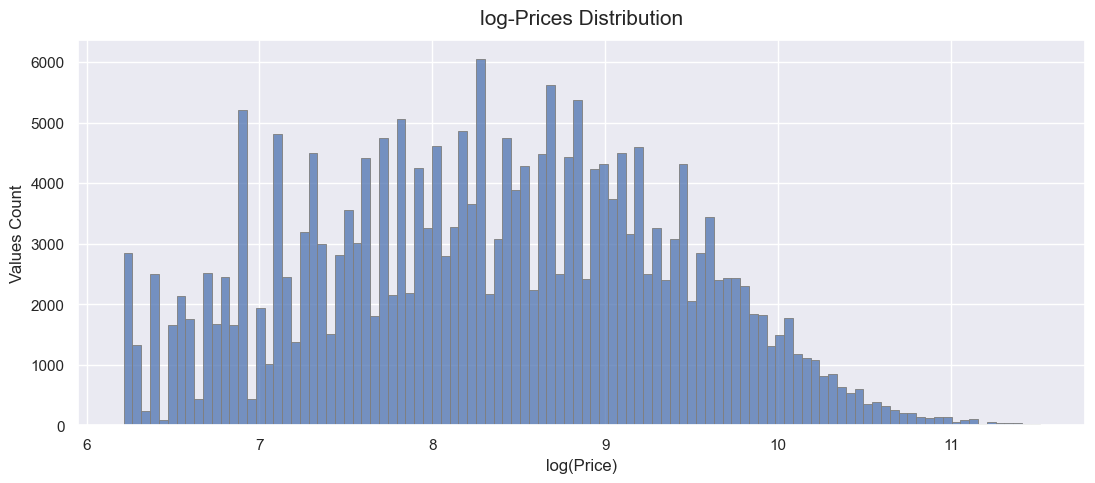

In [20]:
fig = plt.figure(figsize=[13, 5])
ax = fig.add_subplot(111)

data_x = np.log(data["price"])
sns.histplot(x=data_x, edgecolor=".5")

ax.set_xlabel("log(Price)", fontsize=12)
ax.set_ylabel("Values Count", fontsize=12)
ax.set_title("log-Prices Distribution", loc='center', fontsize=15, y=1.02)

plt.show()

Получили, что распределение лог-таргета близко к нормальному распределению (особенно - если бы уменьшили всплески на некоторых значениях, которые скорее всего вызваны тем, что люди обычно ставят цены на товары, которые оканчиваются нулями) => избавились от длинного хвоста => пусть теперь таргетом станет лог-таргет (предсказывать будем также лог-таргет).

In [21]:
data["log_price"] = np.log(data["price"])
data.drop(columns=["price"], inplace = True)
data.head()

,brand,model,vehicleType,gearbox,fuelType,notRepairedDamage,powerPS,kilometer,autoAgeMonths,log_price
0,volkswagen,golf,kleinwagen,manuell,benzin,nein,75,150000,177,7.313220
1,skoda,fabia,kleinwagen,manuell,diesel,nein,69,90000,93,8.188689
2,bmw,3er,limousine,manuell,benzin,ja,102,150000,246,6.476972
3,peugeot,2_reihe,cabrio,manuell,benzin,nein,109,150000,140,7.696213
4,mazda,3_reihe,limousine,manuell,benzin,nein,105,150000,136,7.600902


**Закончили с таргетом!** Пришло время анализировать *признаки*.

- **Бренд:**

In [22]:
data["brand"].unique()

array(['volkswagen', 'skoda', 'bmw', 'peugeot', 'mazda', 'nissan',
       'renault', 'ford', 'mercedes_benz', 'honda', 'fiat', 'mini',
       'smart', 'audi', 'subaru', 'mitsubishi', 'hyundai', 'opel',
       'alfa_romeo', 'seat', 'lancia', 'porsche', 'citroen', 'toyota',
       'kia', 'chevrolet', 'dacia', 'suzuki', 'daihatsu', 'chrysler',
       'volvo', 'jaguar', 'rover', 'jeep', 'saab', 'daewoo', 'land_rover',
       'lada'], dtype=object)

Т.к. данный признак категориальный, то здесь не будет выбросов.

In [23]:
len(data["brand"].unique())

38

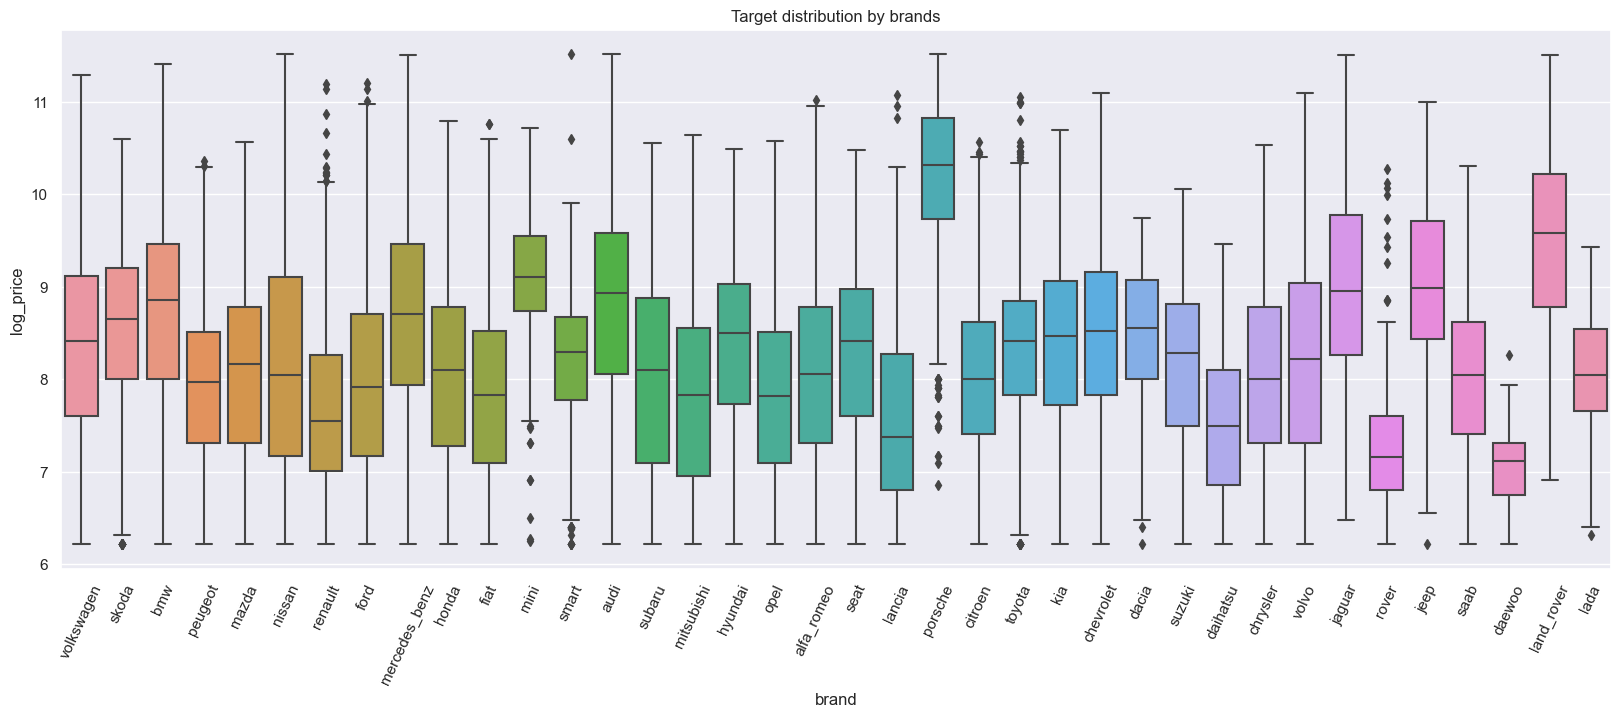

In [24]:
fig = plt.figure(figsize=(20, 7))
ax = fig.add_subplot(111)
ax.tick_params(axis='x', rotation=65)
sns.boxplot(x=data["brand"], y=data["log_price"], ax=ax).set_title("Target distribution by brands")

plt.show()

Получили разные распределения таргета для разных брендов, каждое из них значительно отличается от остальных => признак значимо влияет на таргет => оставляем его.

- **Модель автомобиля:**

Признак категориальный, выбросов не будет...

In [26]:
len(data["model"].unique())

249

In [27]:
data["model"].unique()

array(['golf', 'fabia', '3er', '2_reihe', '3_reihe', 'passat', 'navara',
       'twingo', 'c_max', 'a_klasse', 'scirocco', '5er', 'andere',
       'civic', 'punto', 'e_klasse', 'one', 'clio', '1er', 'b_klasse',
       'fortwo', 'a8', 'jetta', 'c_klasse', 'micra', 'vito', 'sprinter',
       'escort', 'forester', 'fiesta', 'scenic', 'a1', 'focus', 'tt',
       'astra', 'a6', 'jazz', 'transporter', 'polo', 'slk', '7er',
       'combo', '80', '147', 'glk', 'z_reihe', 'ibiza', 'mustang', 'eos',
       'a4', 'touran', 'getz', 'insignia', 'megane', 'a3', 'colt',
       'corsa', 'vectra', 'lupo', 'berlingo', 'm_klasse', 'tiguan',
       '6_reihe', 'c4', 'panda', 'up', 'i_reihe', 'ceed', 'kangoo',
       '5_reihe', 'yeti', 'octavia', 'zafira', 'mii', 'rx_reihe',
       'mondeo', '6er', 'fox', 'matiz', 'beetle', 'rio', 'touareg',
       'logan', 'omega', 'cuore', 's_max', 'modus', 'a2', 'x_reihe', 'a5',
       'galaxy', 'c3', 'viano', 's_klasse', 'sharan', 'avensis', 'sl',
       'roomster', 'q5

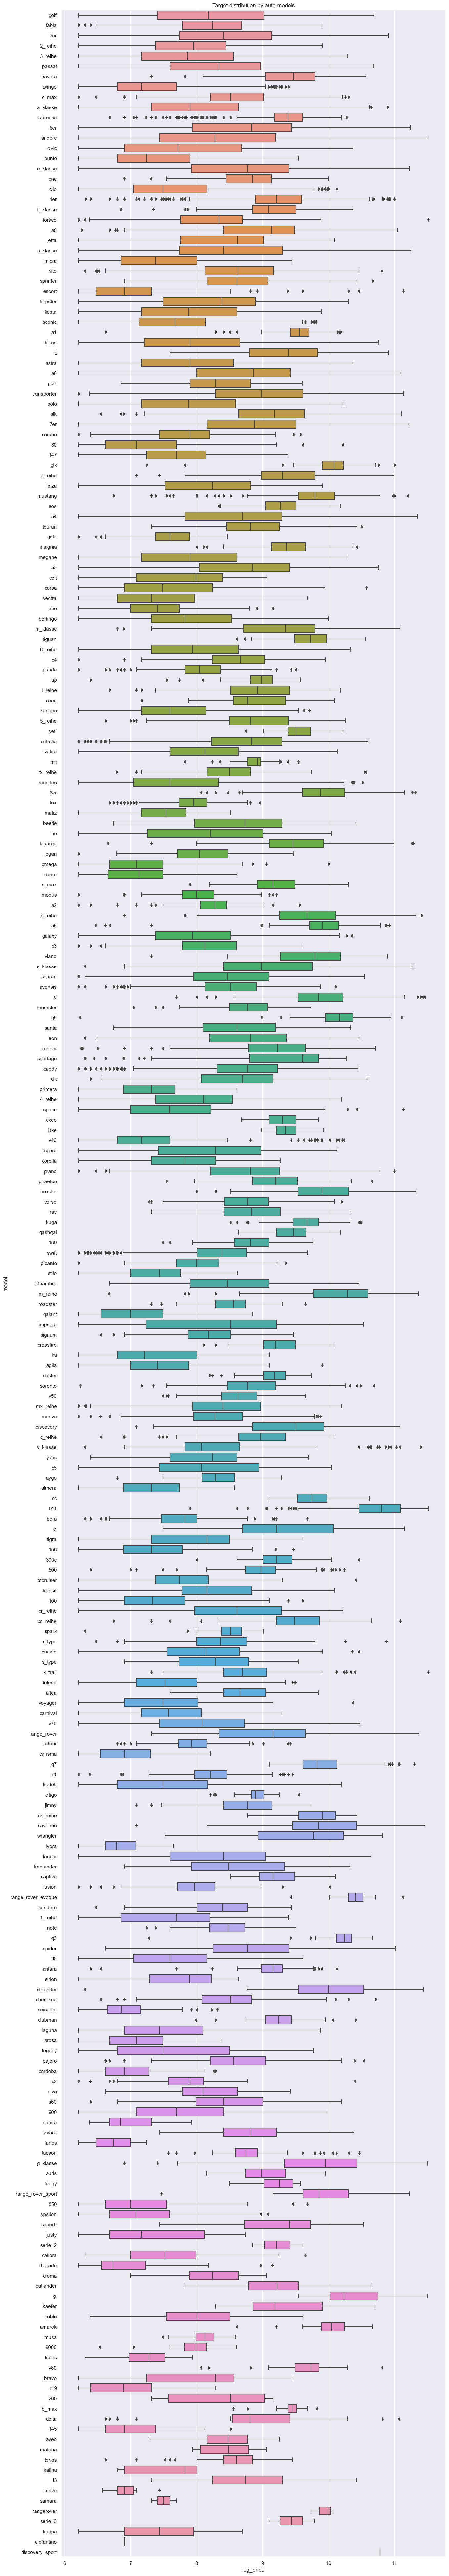

In [30]:
fig = plt.figure(figsize=(15, 100))
ax = fig.add_subplot(111)
sns.boxplot(x=data["log_price"], y=data["model"], orient="h", ax=ax).set_title("Target distribution by auto models")

plt.show()

Получили разные распределения таргета для разных моделей, каждое из них значительно отличается от остальных => признак значимо влияет на таргет => оставляем его.

- **Тип транспортного средства:**

Т.к. данный признак категориальный, то здесь не будет выбросов.

In [31]:
data["vehicleType"].unique()

array(['kleinwagen', 'limousine', 'cabrio', 'kombi', 'suv', 'bus',
       'coupe', 'andere'], dtype=object)

In [32]:
len(data["vehicleType"].unique())

8

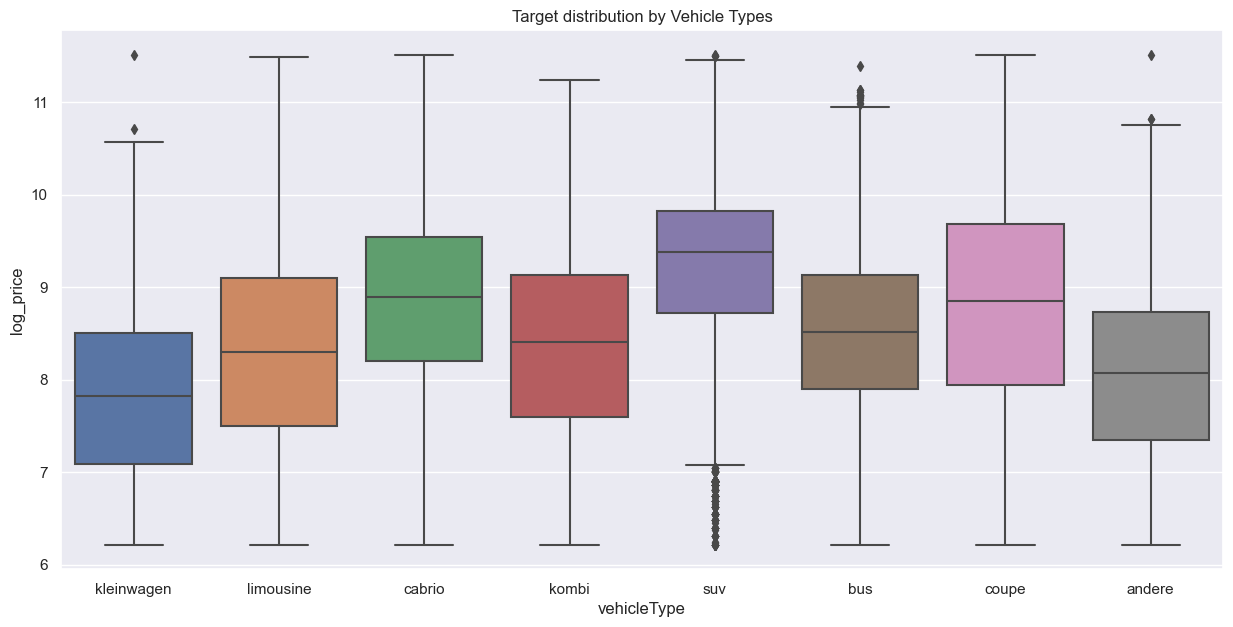

In [33]:
fig = plt.figure(figsize=(15, 7))
ax = fig.add_subplot(111)
sns.boxplot(x=data["vehicleType"], y=data["log_price"], ax=ax).set_title("Target distribution by Vehicle Types")

plt.show()

Получили разные распределения таргета для разных типов, каждое из них достаточно значительно отличается от остальных (Хотя не для каждых двух боксплотов это можно увидеть явно, так как мы смотрим лог-таргет. Тем не менее, чем больше значения лог-таргета, тем больше соответствующие двум соседним значениям цены различаются. Так, например, между значениями `log_price` 8 и 9 в среднем лежит медиана распределения, и между ценами, которым соответствует `data["log_price"] == 8` и `data["log_price"] == 9`, лежит $e^9 - e^8 \approx 5120$ различных значений цен, начиная с $e^8 \approx 2981$, что достаточно много, если смотреть в евро) => признак значимо влияет на таргет => оставляем его.

- **Тип трансмисcии:**

Т.к. данный признак категориальный, то здесь не будет выбросов.

In [34]:
data["gearbox"].unique()

array(['manuell', 'automatik'], dtype=object)

In [35]:
len(data["gearbox"].unique())

2

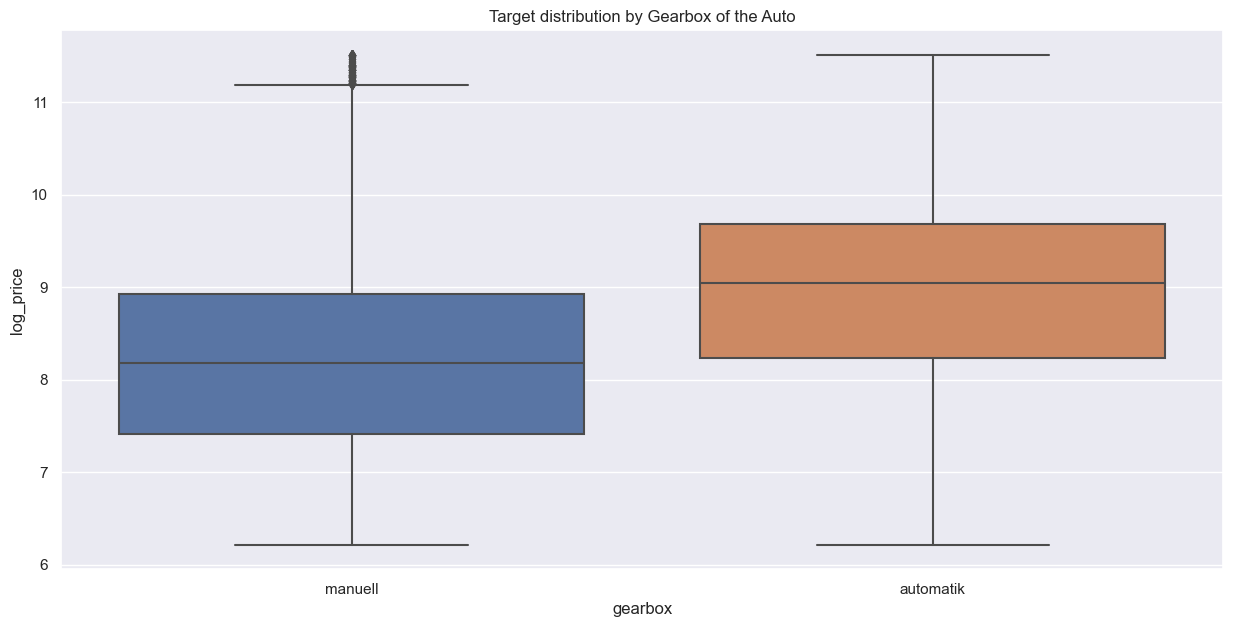

In [36]:
fig = plt.figure(figsize=(15, 7))
ax = fig.add_subplot(111)
sns.boxplot(x=data["gearbox"], y=data["log_price"], ax=ax).set_title("Target distribution by Gearbox of the Auto")

plt.show()

Получили различные распределения таргета для машин на ручном управлении (manuell) и на автоматике (automatik), эти распределения значительно отличаются друг от друга => признак значимо влияет на таргет => оставляем его.

- **Вид топлива:**

Т.к. данный признак категориальный, то здесь не будет выбросов.

In [37]:
data["fuelType"].unique()

array(['benzin', 'diesel', 'lpg', 'andere', 'hybrid', 'cng', 'elektro'],
      dtype=object)

In [38]:
len(data["fuelType"].unique())

7

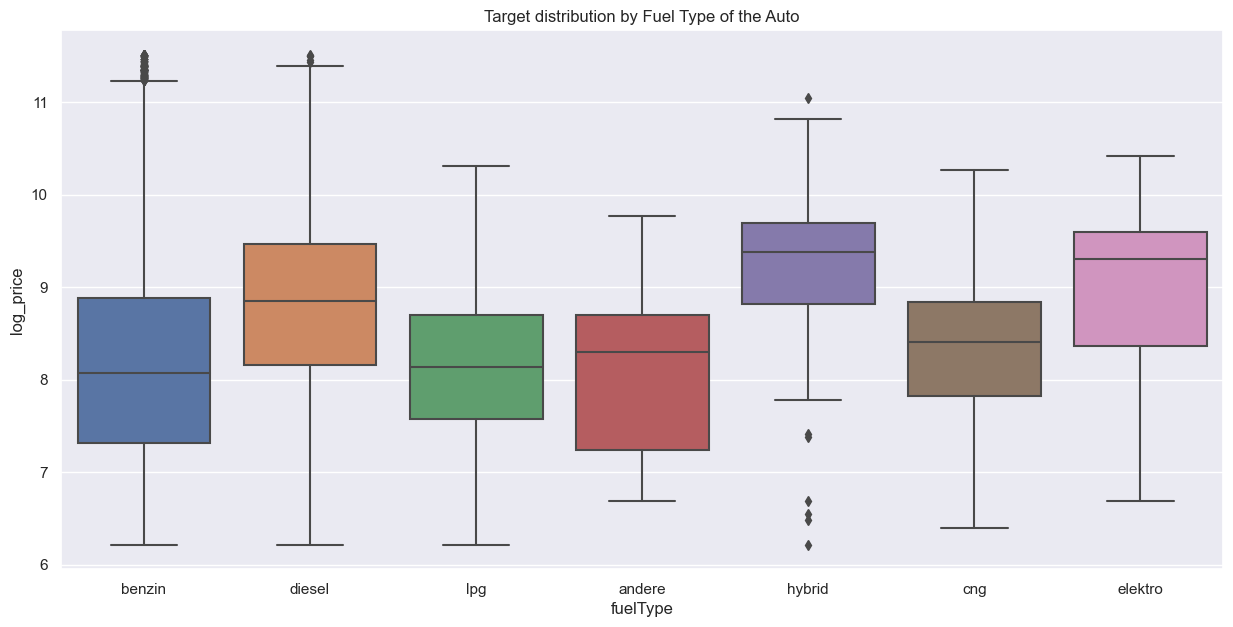

In [39]:
fig = plt.figure(figsize=(15, 7))
ax = fig.add_subplot(111)
sns.boxplot(x=data["fuelType"], y=data["log_price"], ax=ax).set_title("Target distribution by Fuel Type of the Auto")

plt.show()

Получили разные распределения таргета для разных видов топлива, каждое из них достаточно значительно отличается от остальных => признак значимо влияет на таргет => оставляем его.

- **Флаг, показывающий, есть ли в автомобиле неисправность, которая еще не устранена:**

Флаг - категориальный признак (очевидно) => здесь не будет выбросов.

In [40]:
data["notRepairedDamage"].unique()

array(['nein', 'ja'], dtype=object)

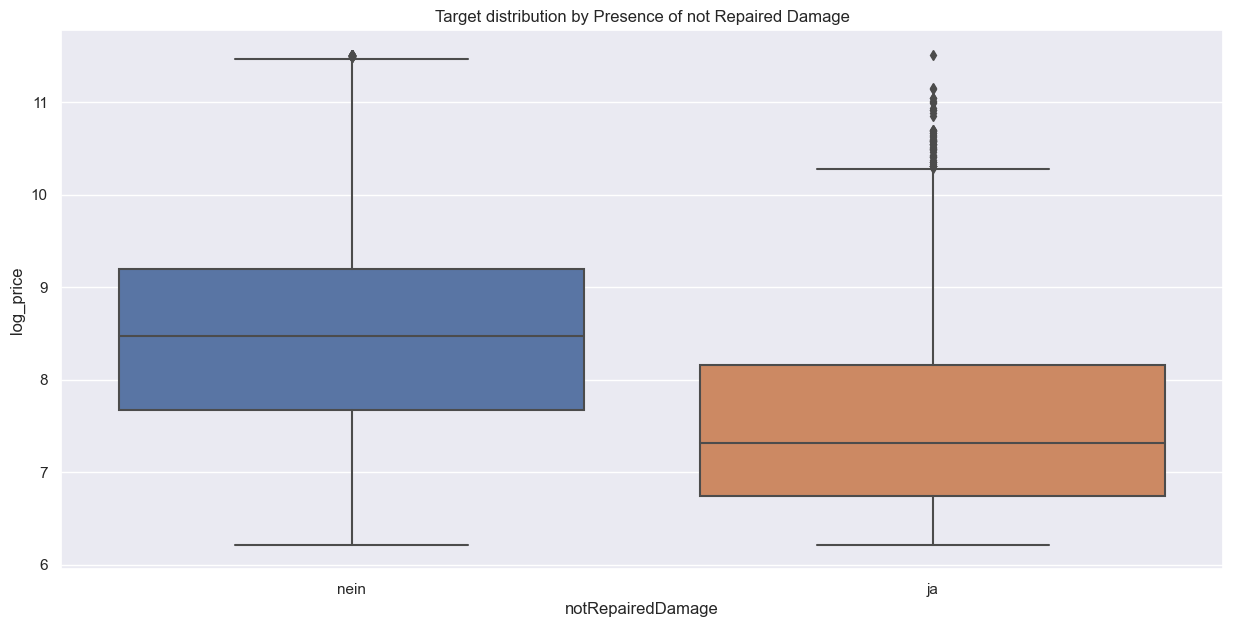

In [41]:
fig = plt.figure(figsize=(15, 7))
ax = fig.add_subplot(111)
sns.boxplot(x=data["notRepairedDamage"], y=data["log_price"], ax=ax).set_title("Target distribution by Presence of not Repaired Damage")

plt.show()

Получили различные распределения таргета для машин, для которых указано, что у них есть неисправности, которые не устранили, и для машин, для которых это не указано. Эти распределения значительно отличаются друг от друга => признак значимо влияет на таргет => оставляем его.

- **Мощность автомобиля в PS:**

Вообще говоря, этот признак вещественный, так как значения мощности - положительные вещественные числа, над которыми можно совершать арифметические операции. Но его можно рассматривать и как категориальный, если в датасете, например, будет представлено мало значений данного признака (то есть в случае сортировки по возрастанию значений - это как бы отметки, обозначающие границы отрезков значений мощности). Для того, чтобы принять решение о том, к какому типу относится данный признак, требуется дальнейший анализ.  

In [42]:
np.sort(data["powerPS"].unique())

array([ 51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,
        64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,
        77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,
        90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102,
       103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115,
       116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128,
       129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141,
       142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154,
       155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167,
       168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180,
       181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193,
       194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206,
       207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219,
       220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 23

In [43]:
len(data["powerPS"].unique())

406

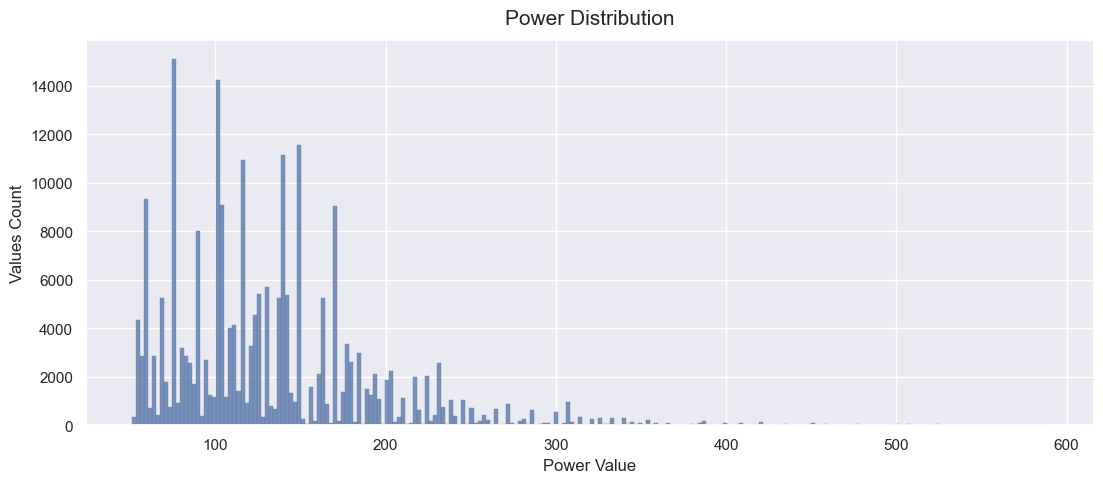

In [44]:
fig = plt.figure(figsize=[13, 5])
ax = fig.add_subplot(111)

data_x = data["powerPS"]
sns.histplot(x=data_x, edgecolor=".5")

ax.set_xlabel("Power Value", fontsize=12)
ax.set_ylabel("Values Count", fontsize=12)
ax.set_title("Power Distribution", loc='center', fontsize=15, y=1.02)

plt.show()

В результате рассмотрения графика распределения мощностей и массива уникальных значений признака и зная мощности современных автомобилей, можно сделать вывод, что выбросов для данного признака нет => оставляем данные как есть.

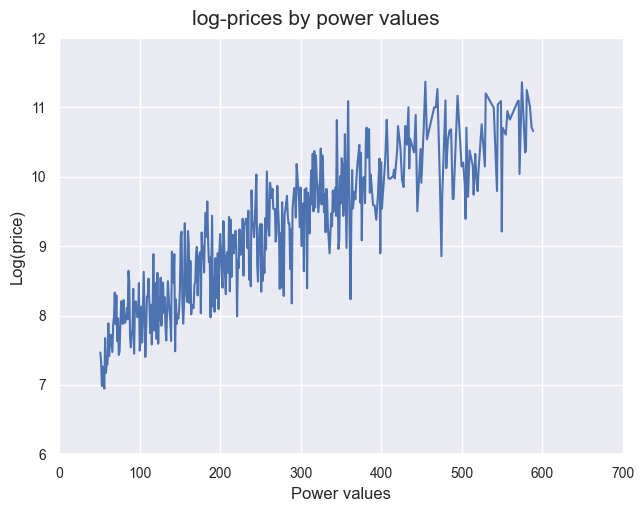

In [45]:
plot = sns.relplot(data=data, x="powerPS", y="log_price", kind="line", errorbar=None, aspect=1.3)

plot.set_axis_labels("Power values", "Log(price)")
plot.fig.suptitle("log-prices by power values", fontsize=15, y=1.02)
plot.axes.flat[0].set_xticks(plot.axes.flat[0].get_xticks())
plot.axes.flat[0].set_xticklabels(fontsize=10, labels=plot.axes.flat[0].get_xticklabels())
plot.axes.flat[0].set_yticks(plot.axes.flat[0].get_yticks())
plot.axes.flat[0].set_yticklabels(fontsize=10, labels=plot.axes.flat[0].get_yticklabels())
plt.show()

На графике выше видно, что в зависимости между мощностью и лог-таргетом есть возрастающий линейный тренд. Ввиду этой линейной связи оставляем признак в модели (результат хорошо объясним (как и в реальной жизни, чем мощнее автомобиль, тем он дороже); данные признака влияют на лог-таргет линейно => подходит для линейной регрессии).

- **Пробег:**

In [46]:
np.sort(data["kilometer"].unique())

array([  5000,  10000,  20000,  30000,  40000,  50000,  60000,  70000,
        80000,  90000, 100000, 125000, 150000], dtype=int64)

In [47]:
len(data["kilometer"].unique())

13

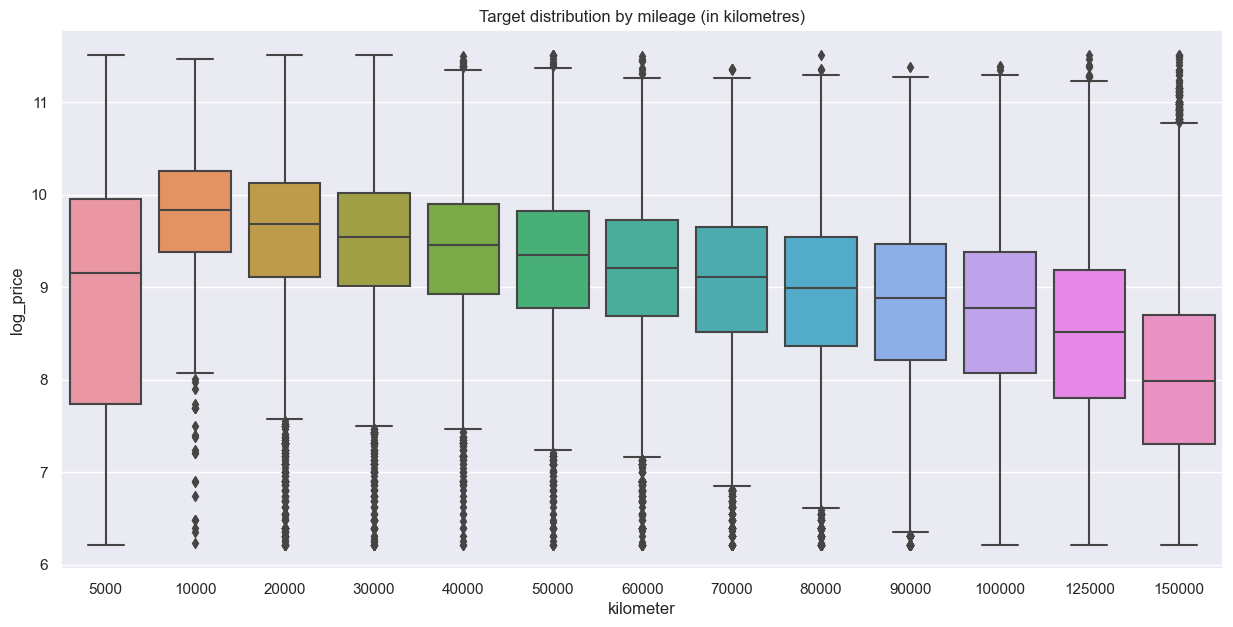

In [48]:
fig = plt.figure(figsize=(15, 7))
ax = fig.add_subplot(111)
sns.boxplot(x=data["kilometer"], y=data["log_price"], ax=ax).set_title("Target distribution by mileage (in kilometres)")

plt.show()

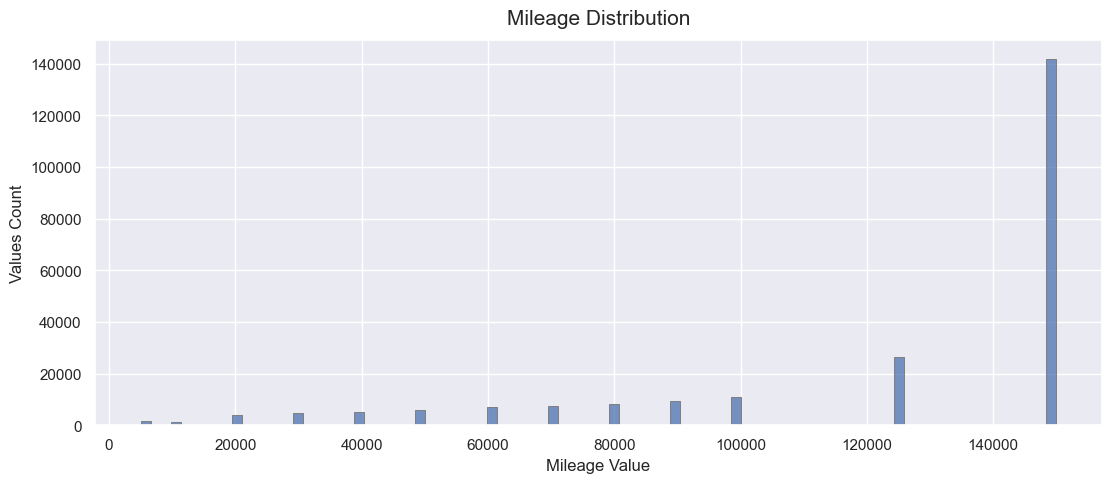

In [49]:
fig = plt.figure(figsize=[13, 5])
ax = fig.add_subplot(111)

data_x = data["kilometer"]
sns.histplot(x=data_x, edgecolor=".5")

ax.set_xlabel("Mileage Value", fontsize=12)
ax.set_ylabel("Values Count", fontsize=12)
ax.set_title("Mileage Distribution", loc='center', fontsize=15, y=1.02)

plt.show()

Как видно на графике распределения значений, значений пробега, равных $5000$, крайне мало => так как эти значения ещё и не объясняют нашу модель и ломают тренд, выбросим из датасета все значения, для которых пробег равен $5000$. 

In [50]:
data = data.loc[data["kilometer"] > 5000, :]
data.reset_index(drop=True)

,brand,model,vehicleType,gearbox,fuelType,notRepairedDamage,powerPS,kilometer,autoAgeMonths,log_price
0,volkswagen,golf,kleinwagen,manuell,benzin,nein,75,150000,177,7.313220
1,skoda,fabia,kleinwagen,manuell,diesel,nein,69,90000,93,8.188689
2,bmw,3er,limousine,manuell,benzin,ja,102,150000,246,6.476972
3,peugeot,2_reihe,cabrio,manuell,benzin,nein,109,150000,140,7.696213
4,mazda,3_reihe,limousine,manuell,benzin,nein,105,150000,136,7.600902
...,...,...,...,...,...,...,...,...,...,...
232507,volkswagen,golf,limousine,manuell,diesel,nein,140,150000,69,8.974618
232508,seat,leon,limousine,manuell,benzin,ja,225,150000,142,8.070906
232509,smart,fortwo,cabrio,automatik,benzin,nein,101,125000,192,7.089243
232510,volkswagen,transporter,bus,manuell,diesel,nein,102,150000,241,9.126959


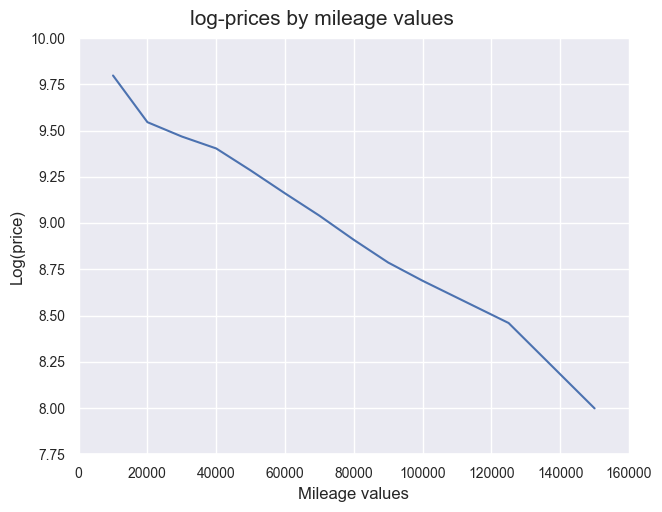

In [51]:
plot = sns.relplot(data=data, x="kilometer", y="log_price", kind="line", errorbar=None, aspect=1.3)

plot.set_axis_labels("Mileage values", "Log(price)")
plot.fig.suptitle("log-prices by mileage values", fontsize=15, y=1.02)
plot.axes.flat[0].set_xticks(plot.axes.flat[0].get_xticks())
plot.axes.flat[0].set_xticklabels(fontsize=10, labels=plot.axes.flat[0].get_xticklabels())
plot.axes.flat[0].set_yticks(plot.axes.flat[0].get_yticks())
plot.axes.flat[0].set_yticklabels(fontsize=10, labels=plot.axes.flat[0].get_yticklabels())
plt.show()

Рассматриваем данный признак без первого уникального значения пробега, так как он не интерпретируем и не репрезентативен сам по себе. Рассматриваем его как вещественный признак, так как теперь между значениями есть явный убывающий тренд, близкий к линейному, - в разбиении на категории нет особого смысла. Естественно признак стоит оставить в модели в силу существующей почти линейной зависимости (результат хорошо объясним (как и в реальной жизни, чем мощнее автомобиль, тем он дороже); данные признака влияют на лог-таргет линейно => подходит для линейной регрессии)

- **Возраст автомобиля в месяцах:**

In [52]:
np.sort(data["autoAgeMonths"].unique())

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [53]:
len(data["autoAgeMonths"].unique())

594

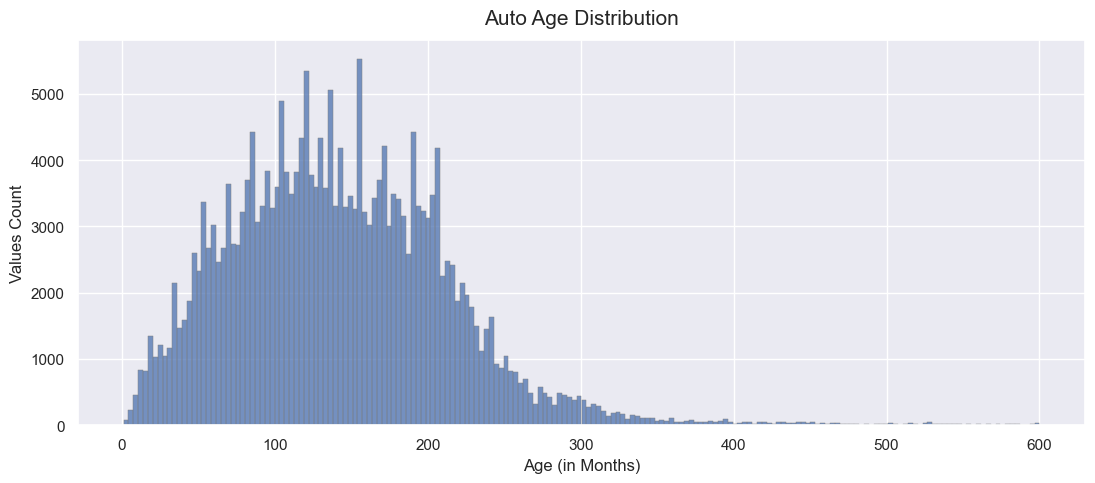

In [55]:
fig = plt.figure(figsize=[13, 5])
ax = fig.add_subplot(111)

data_x = data["autoAgeMonths"]
sns.histplot(x=data_x, edgecolor=".5")

ax.set_xlabel("Age (in Months)", fontsize=12)
ax.set_ylabel("Values Count", fontsize=12)
ax.set_title("Auto Age Distribution", loc='center', fontsize=15, y=1.02)

plt.show()

У распределения длинный хвост, но он объясним: мало таких людей, у которых есть такие старые машины и готовность их продать на Ebay (например, если говорить о машинах, которым по 40-50 лет).

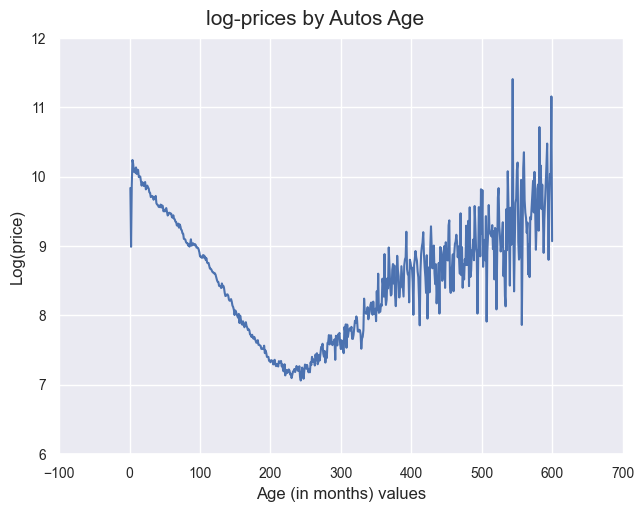

In [56]:
plot = sns.relplot(data=data, x="autoAgeMonths", y="log_price", kind="line", errorbar=None, aspect=1.3)

plot.set_axis_labels("Age (in months) values", "Log(price)")
plot.fig.suptitle("log-prices by Autos Age", fontsize=15, y=1.02)
plot.axes.flat[0].set_xticks(plot.axes.flat[0].get_xticks())
plot.axes.flat[0].set_xticklabels(fontsize=10, labels=plot.axes.flat[0].get_xticklabels())
plot.axes.flat[0].set_yticks(plot.axes.flat[0].get_yticks())
plot.axes.flat[0].set_yticklabels(fontsize=10, labels=plot.axes.flat[0].get_yticklabels())
plt.show()

Здесь сначала представлен убывающий тренд, значения лог-таргета с низким разбросом, а начиная с возраста, равного $\approx 250$ месяцев, тренд меняется на возрастающий, причём разброс очень большой. Это можно объяснить так: машина сначала новая и поэтому дорогая в силу своей новизны, затем с течением времени цена на неё начинает падать, а затем в какой-то момент она может стать раритетной, и поэтому цена на неё с каждым месяцем будет снова расти. При этом высокий разброс цен для очень старых машин можно объяснить тем, что очень старая машина может быть как совсем "ведром с гайками", а может быть, раритетной дорогой моделью для коллекционеров.

Таким образом, оставляем этот признак в данных, так как он очень хорошо объясняет цену на автомобили.

Пришло время посплитить данные!

In [68]:
categorical = ['brand', 'model', 'vehicleType', 'gearbox', 'fuelType', 'notRepairedDamage']
numeric = ['powerPS', 'kilometer', 'autoAgeMonths']
other = []

In [69]:
data = data.copy(deep=True) # Копируем данные, чтобы избежать SettingWithCopyWarning

In [70]:
data['bias'] = 1
other += ['bias']

x = data[categorical + numeric + other]
y = data['log_price']

In [71]:
other 

['bias']

In [72]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler


column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown='ignore'), categorical),
    ('scaling', StandardScaler(), numeric),
    ('other',  'passthrough', other)
])

x = column_transformer.fit_transform(x)

In [73]:
from sklearn.model_selection import train_test_split

X_train_val, X_test, y_train_val, y_test = train_test_split(x, y, test_size=0.1)

val_size = (100 / 90 * 10) / 100  # (100% (new) / 90% (old) * 10%) / 100

X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=val_size)

Для дальнейшей корректной работы всех градиентных спусков, написанных в `descents.py`, применим `reset_index` для всех столбцов `y_{...}`, так как в них индексы перемешанные (идут не с нуля и необязательно возрастают), а в `X_{...}`, представленных, как sparse matrix - нет (то есть идут с нуля и возрастают).

In [74]:
y_train.reset_index(drop = True, inplace = True)
y_val.reset_index(drop=True, inplace=True)
y_train_val.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

## Задание 5. Сравнение методов градиентного спуска (2 балла)

В этом задании вам предстоит сравнить методы градиентного спуска на подготовленных вами данных из предыдущего задания.

### Задание 5.1. Подбор оптимальной длины шага (1 балл)

Подберите по валидационной выборке наилучшую длину шага $\lambda$ для каждого метода с точки зрения ошибки. Для этого сделайте перебор по логарифмической сетке. Для каждого метода посчитайте ошибку на обучающей и тестовой выборках, посчитайте качество по метрике $R^2$, сохраните количество итераций до сходимости.

Все параметры кроме `lambda_` стоит выставить равным значениям по умолчанию.

- **Полный градиентный спуск:**

Подбор `lambda_`:

In [76]:
lambdas = np.logspace(-7, 0, num = 8)
best_lambda_full = None
best_loss = 1e11

for lambda_ in lambdas:
    descent_config = {
        'descent_name':'full',
        'kwargs':{
            'dimension': X_train.shape[1],
            'lambda_': lambda_
        }
    }
    regression = LinearRegression(
        descent_config=descent_config
    )
    regression.fit(X_train, y_train)
    curr_loss = regression.calc_loss(X_val, y_val)
    print("lambda_: {0}, loss: {1}".format(lambda_, curr_loss))
    if curr_loss < best_loss:
        best_loss = curr_loss
        best_lambda_full = lambda_

print()
print("best_lambda_ = {0}".format(best_lambda_full))

lambda_: 1e-07, loss: 21.648163743576315
lambda_: 1e-06, loss: 32.04397538786634
lambda_: 1e-05, loss: 26.11219286990979
lambda_: 0.0001, loss: 31.50713918535796
lambda_: 0.001, loss: 25.576697099451927
lambda_: 0.01, loss: 6.436401402053501
lambda_: 0.1, loss: 0.5985900185503317
lambda_: 1.0, loss: 0.31743327968801066

best_lambda_ = 1.0


Найдём loss на трейне (будем здесь за трейн считать объединение трейн и вал, чтобы у нас было больше данных) и на тесте, значение $R^2$ на тесте и кол-во итераций до сходимости при `best_lambda_`:

In [85]:
from sklearn.metrics import r2_score
descent_config = {
    'descent_name': 'full',
    'kwargs': {
        'dimension': X_train_val.shape[1],
        'lambda_': best_lambda_full
    }
 }
regression = LinearRegression(
    descent_config=descent_config
)
regression.fit(X_train_val, y_train_val)

print("Loss on Train:", regression.calc_loss(X_train_val, y_train_val))
print("Loss on Test:", regression.calc_loss(X_test, y_test))
print("R^2 on Test:", r2_score(y_test, regression.predict(X_test)))
print("Iterations made until convergence:", len(regression.loss_history) - 1)


Loss on Train: 0.30738710894824767
Loss on Test: 0.3042592617900154
R^2 on Test: 0.7183074765513117
Iterations made until convergence: 39


- **Стохастический градиентный спуск:**

In [89]:
lambdas = np.logspace(-7, 0, num=8)
best_lambda_stochastic = None
best_loss = 1e11

for lambda_ in lambdas:
    descent_config = {
        'descent_name': 'stochastic',
        'kwargs': {
            'dimension': X_train.shape[1],
            'lambda_': lambda_
        }
    }
    regression = LinearRegression(
            descent_config=descent_config
    )
    regression.fit(X_train, y_train)
    curr_loss = regression.calc_loss(X_val, y_val)
    print("lambda_: {0}, loss: {1}".format(lambda_, curr_loss))
    if curr_loss < best_loss:
        best_loss = curr_loss
        best_lambda_stochastic = lambda_

print()
print("best_lambda_ = {0}".format(best_lambda_stochastic))

lambda_: 1e-07, loss: 26.27491202464456
lambda_: 1e-06, loss: 18.444637675467426
lambda_: 1e-05, loss: 23.17748122576255
lambda_: 0.0001, loss: 26.37012030385004
lambda_: 0.001, loss: 37.38234042826745
lambda_: 0.01, loss: 7.767217018388237
lambda_: 0.1, loss: 0.6113250502878758
lambda_: 1.0, loss: 169.88436566698675

best_lambda_ = 0.1


In [91]:
descent_config = {
    'descent_name': 'stochastic',
    'kwargs': {
        'dimension': X_train_val.shape[1],
        'lambda_': best_lambda_stochastic
    }
 }
regression = LinearRegression(
        descent_config=descent_config
)
regression.fit(X_train_val, y_train_val)

print("Loss on Train:", regression.calc_loss(X_train_val, y_train_val))
print("Loss on Test:", regression.calc_loss(X_test, y_test))
print("R^2 on Test:", r2_score(y_test, regression.predict(X_test)))
print("Iterations made until convergence:", len(regression.loss_history) - 1)

Loss on Train: 0.6257773936533519
Loss on Test: 0.6262365321230641
R^2 on Test: 0.42021107928918777
Iterations made until convergence: 29


- **Градиентный спуск с momentum:**

In [92]:
lambdas = np.logspace(-7, 0, num=8)
best_lambda_momentum = None
best_loss = 1e11

for lambda_ in lambdas:
    descent_config = {
        'descent_name': 'momentum',
        'kwargs': {
            'dimension': X_train.shape[1],
            'lambda_': lambda_
        }
    }
    regression = LinearRegression(
            descent_config=descent_config
    )
    regression.fit(X_train, y_train)
    curr_loss = regression.calc_loss(X_val, y_val)
    print("lambda_: {0}, loss: {1}".format(lambda_, curr_loss))
    if curr_loss < best_loss:
        best_loss = curr_loss
        best_lambda_momentum = lambda_

print()
print("best_lambda_ = {0}".format(best_lambda_momentum))

lambda_: 1e-07, loss: 23.66204678539914
lambda_: 1e-06, loss: 31.56612513845545
lambda_: 1e-05, loss: 37.75715717880959
lambda_: 0.0001, loss: 27.646793206140213
lambda_: 0.001, loss: 4.378748352106842
lambda_: 0.01, loss: 0.5173130589333274
lambda_: 0.1, loss: 0.322415430528628
lambda_: 1.0, loss: 0.2427651536590771

best_lambda_ = 1.0


In [93]:
descent_config = {
    'descent_name': 'momentum',
    'kwargs': {
        'dimension': X_train_val.shape[1],
        'lambda_': best_lambda_momentum
    }
 }
regression = LinearRegression(
        descent_config=descent_config
)
regression.fit(X_train_val, y_train_val)

print("Loss on Train:", regression.calc_loss(X_train_val, y_train_val))
print("Loss on Test:", regression.calc_loss(X_test, y_test))
print("R^2 on Test:", r2_score(y_test, regression.predict(X_test)))
print("Iterations made until convergence:", len(regression.loss_history) - 1)

Loss on Train: 0.24396716206541227
Loss on Test: 0.24011894621005866
R^2 on Test: 0.7776905409951568
Iterations made until convergence: 121


- **Adam:**

In [94]:
lambdas = np.logspace(-7, 0, num=8)
best_lambda_adam = None
best_loss = 1e11

for lambda_ in lambdas:
    descent_config = {
        'descent_name': 'adam',
        'kwargs': {
            'dimension': X_train.shape[1],
            'lambda_': lambda_
        }
    }
    regression = LinearRegression(
            descent_config=descent_config
    )
    regression.fit(X_train, y_train)
    curr_loss = regression.calc_loss(X_val, y_val)
    print("lambda_: {0}, loss: {1}".format(lambda_, curr_loss))
    if curr_loss < best_loss:
        best_loss = curr_loss
        best_lambda_adam = lambda_

print()
print("best_lambda_ = {0}".format(best_lambda_adam))

lambda_: 1e-07, loss: 40.54390105660517
lambda_: 1e-06, loss: 28.518041883386083
lambda_: 1e-05, loss: 24.033685785220488
lambda_: 0.0001, loss: 20.51337744497194
lambda_: 0.001, loss: 33.279194643481276
lambda_: 0.01, loss: 10.855736789534479
lambda_: 0.1, loss: 0.24634501393953054
lambda_: 1.0, loss: 0.22410788625327588

best_lambda_ = 1.0


In [99]:
descent_config = {
    'descent_name': 'adam',
    'kwargs': {
        'dimension': X_train_val.shape[1],
        'lambda_': best_lambda_adam
    }
 }
regression = LinearRegression(
        descent_config=descent_config
)
regression.fit(X_train_val, y_train_val)

print("Loss on Train:", regression.calc_loss(X_train_val, y_train_val))
print("Loss on Test:", regression.calc_loss(X_test, y_test))
print("R^2 on Test:", r2_score(y_test, regression.predict(X_test)))
print("Iterations made until convergence:", len(regression.loss_history) - 1)

Loss on Train: 0.22238360846979463
Loss on Test: 0.21960905550629148
R^2 on Test: 0.7966792246395294
Iterations made until convergence: 184


### Задание 5.2. Сравнение методов (1 балла) 

Постройте график зависимости ошибки на обучающей выборке от номера итерации (все методы на одном графике).

Посмотрите на получившиеся результаты (таблички с метриками и график). Сравните методы между собой.

Построим график зависимости лосса на трейне (точнее, на объединении трейна и валидации) от номера итерации градиентного спуска для всех методов (для методов берём наилучший для каждого из них параметр `lambda_`):

In [103]:
descent_config = {
    'descent_name': 'full',
    'kwargs': {
        'dimension': X_train_val.shape[1],
        'lambda_': best_lambda_full
    }
 }
regression_full_descent = LinearRegression(
        descent_config=descent_config
)
regression_full_descent.fit(X_train_val, y_train_val)

descent_config = {
    'descent_name': 'stochastic',
    'kwargs': {
        'dimension': X_train_val.shape[1],
        'lambda_': best_lambda_stochastic
    }
 }
regression_stochastic_descent = LinearRegression(
        descent_config=descent_config
)
regression_stochastic_descent.fit(X_train_val, y_train_val)

descent_config = {
    'descent_name': 'momentum',
    'kwargs': {
        'dimension': X_train_val.shape[1],
        'lambda_': best_lambda_momentum
    }
 }
regression_momentum_descent = LinearRegression(
        descent_config=descent_config
)
regression_momentum_descent.fit(X_train_val, y_train_val)

descent_config = {
    'descent_name': 'adam',
    'kwargs': {
        'dimension': X_train_val.shape[1],
        'lambda_': best_lambda_adam
    }
 }
regression_adam = LinearRegression(
        descent_config=descent_config
)
regression_adam.fit(X_train_val, y_train_val)

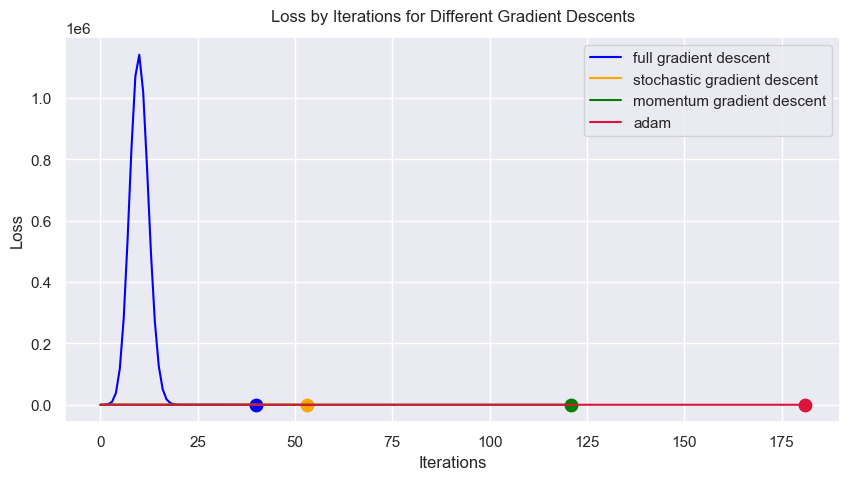

In [104]:
fig = plt.figure(figsize=[10, 5])
ax = fig.add_subplot(111)

ax.plot(np.arange(0, len(regression_full_descent.loss_history)), regression_full_descent.loss_history, label="full gradient descent", color="blue")
ax.scatter(len(regression_full_descent.loss_history) - 1, regression_full_descent.loss_history[-1], color="blue", s=80)
ax.plot(np.arange(0, len(regression_stochastic_descent.loss_history)), regression_stochastic_descent.loss_history, label="stochastic gradient descent", color="orange")
ax.scatter(len(regression_stochastic_descent.loss_history) - 1, regression_stochastic_descent.loss_history[-1], color="orange", s=80)
ax.plot(np.arange(0, len(regression_momentum_descent.loss_history)), regression_momentum_descent.loss_history, label="momentum gradient descent", color="green")
ax.scatter(len(regression_momentum_descent.loss_history) - 1, regression_momentum_descent.loss_history[-1], color="green", s=80)
ax.plot(np.arange(0, len(regression_adam.loss_history)), regression_adam.loss_history, label="adam", color="crimson")
ax.scatter(len(regression_adam.loss_history) - 1, regression_adam.loss_history[-1], color="crimson", s=80)

ax.set_xlabel("Iterations")
ax.set_ylabel("Loss")
ax.set_title("Loss by Iterations for Different Gradient Descents", fontsize=12, y=1.02)
ax.legend()

plt.show()

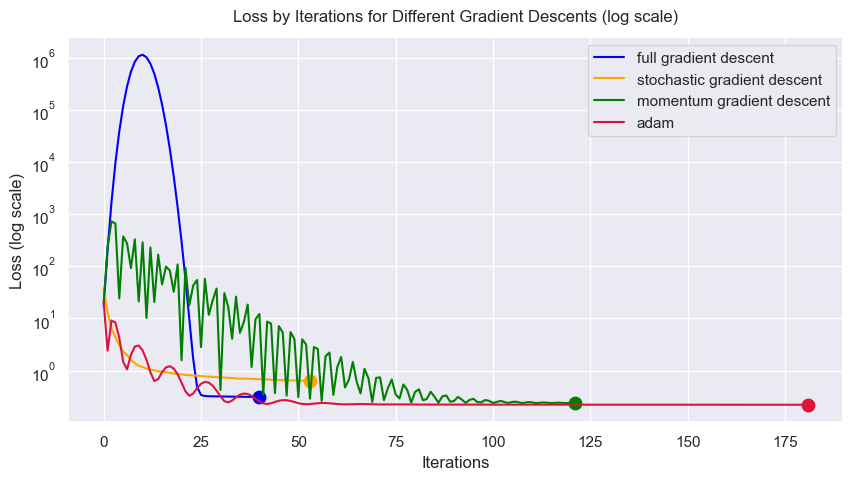

In [105]:
fig = plt.figure(figsize=[10, 5])
ax = fig.add_subplot(111)

ax.plot(np.arange(0, len(regression_full_descent.loss_history)), regression_full_descent.loss_history, label="full gradient descent", color="blue")
ax.scatter(len(regression_full_descent.loss_history) - 1, regression_full_descent.loss_history[-1], color="blue", s=80)
ax.plot(np.arange(0, len(regression_stochastic_descent.loss_history)), regression_stochastic_descent.loss_history, label="stochastic gradient descent", color="orange")
ax.scatter(len(regression_stochastic_descent.loss_history) - 1, regression_stochastic_descent.loss_history[-1], color="orange", s=80)
ax.plot(np.arange(0, len(regression_momentum_descent.loss_history)), regression_momentum_descent.loss_history, label="momentum gradient descent", color="green")
ax.scatter(len(regression_momentum_descent.loss_history) - 1, regression_momentum_descent.loss_history[-1], color="green", s=80)
ax.plot(np.arange(0, len(regression_adam.loss_history)), regression_adam.loss_history, label="adam", color="crimson")
ax.scatter(len(regression_adam.loss_history) - 1, regression_adam.loss_history[-1], color="crimson", s=80)

ax.set_xlabel("Iterations")
ax.set_ylabel("Loss (log scale)")
ax.set_yscale("log")
ax.set_title("Loss by Iterations for Different Gradient Descents (log scale)", fontsize=12, y=1.02)
ax.legend()

plt.show()

**Сравнение методов по графику:**

- Из графика выше видно, что быстрее всех сошёлся полный градиентный спуск (чуть больше 25 итераций), далее - стохастический градиентный спуск (чуть больше 50 итераций), за ним - momentum gradient descent (немного меньше, чем 125 итераций), медленнее всех сходится adam (больше 175 итераций).

- Результаты по сходимости следующие: стохастический градиентный спуск показал себя хуже всего по качеству (ошибка выше остальных спусков) (это можно объяснить небольшим размером батча и малым числом итераций, так как стохастический градиентный спуск использует не весь градиент на шаге, а только его часть, то есть берёт не всю информацию об объектах), далее - полный градиентный спуск, за ним - momentum gradient descent, лучше всех по качеству - adam.

- Полный градиентный спуск до 25 итерации показывает очень большую ошибку - она достигает значений, больших, чем 1e6, что очень много, а дальше она резко уменьшается. Поэтому, если бы мы остановились достаточно рано, то получили бы очень плохой скор. Это можно объяснить тем, что learning rate в самом начале достаточно большой и что значения градиента в начале обучения скорее всего тоже велики по модулю => сначала делаем очень большие шаги по модулю, причём вектор градиента направлен по-разному в разных точках => из-за этого и получается такая высокая ошибка в начале.

- В сравнении с полным градиентным спуском колебания ошибки для momentum gradient descent гораздо меньше, при этом в этом графике прослеживается явный убывающий тренд. Это связано с тем, что momentum gradient descent гораздо более устойчив к изменениям градиента в силу накопления градиентов.

- Ошибка для adam также колеблется - и не очень сильно, как и в случае с momentum gradient descent. Если быть точнее, эти колебания ещё меньше, и они раньше прекращаются. Это можно объяснить тем, что adam кроме идеи с накоплением величин, ещё и делает адаптивные шаги для разных компонент, что также уменьшает осцилляции.  

## Задание 6. Стохастический градиентный спуск и размер батча (1 балл)

В этом задании вам предстоит исследовать влияние размера батча на работу стохастического градиентного спуска. 

* Сделайте по несколько запусков (например, k = 10) стохастического градиентного спуска на обучающей выборке для каждого размера батча из перебираемого списка. Замерьте время в секундах и количество итераций до сходимости. Посчитайте среднее этих значений для каждого размера батча.
* Постройте график зависимости количества шагов до сходимости от размера батча.
* Постройте график зависимости времени до сходимости от размера батча.

Посмотрите на получившиеся результаты. Какие выводы можно сделать про подбор размера батча для стохастического градиентного спуска?

In [106]:
import datetime

In [108]:
batch_sizes = np.arange(5, 500, 10)

k = 10
avg_time_records = []
avg_iters_number_records = []

for batch_size in batch_sizes:
    time_sum_sec = 0.
    iters_number_sum = 0
    for i in range(k):
        descent_config = {
            'descent_name': 'stochastic',
            'kwargs': {
                'dimension': X_train_val.shape[1],
                'lambda_': best_lambda_stochastic,
                'batch_size': batch_size
            }
        }
        regression = LinearRegression(
            descent_config = descent_config
        )

        timer_start = datetime.datetime.now()
        regression.fit(X_train_val, y_train_val)
        timer_end = datetime.datetime.now()
        time_diff = (timer_end - timer_start).total_seconds()
        time_sum_sec += time_diff
        iters_number_sum += (len(regression.loss_history)-1)
    time_avg = time_sum_sec / k
    avg_time_records.append(time_avg)
    iters_number_avg = iters_number_sum // k
    avg_iters_number_records.append(iters_number_avg)

    print("-------------------------------------")
    print("batch_size:", batch_size)
    print("avg time:", time_avg)
    print("avg iters:", iters_number_avg)
    print()

-------------------------------------
batch_size: 5
avg time: 0.6033955
avg iters: 61

-------------------------------------
batch_size: 15
avg time: 0.4946486
avg iters: 48

-------------------------------------
batch_size: 25
avg time: 0.45685560000000003
avg iters: 47

-------------------------------------
batch_size: 35
avg time: 0.3839251999999999
avg iters: 38

-------------------------------------
batch_size: 45
avg time: 0.33900759999999996
avg iters: 33

-------------------------------------
batch_size: 55
avg time: 0.42434960000000005
avg iters: 38

-------------------------------------
batch_size: 65
avg time: 0.3946311
avg iters: 36

-------------------------------------
batch_size: 75
avg time: 0.3874966000000001
avg iters: 34

-------------------------------------
batch_size: 85
avg time: 0.37762049999999997
avg iters: 30

-------------------------------------
batch_size: 95
avg time: 0.4752734
avg iters: 34

-------------------------------------
batch_size: 105
avg time:

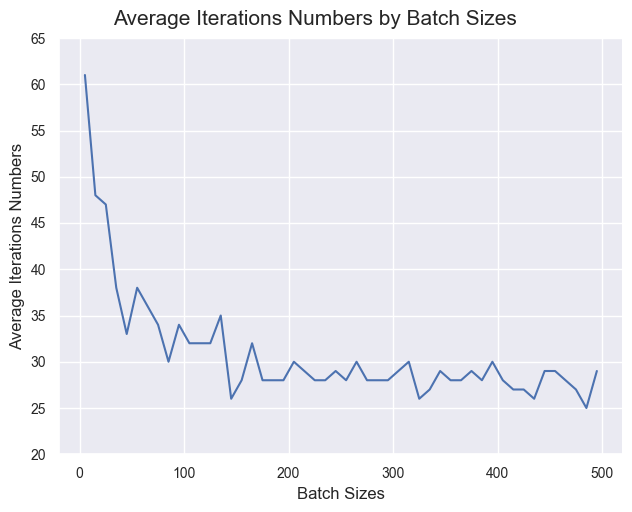

In [109]:
plot = sns.relplot(x=batch_sizes, y=avg_iters_number_records, kind="line", errorbar=None, aspect=1.3)

plot.set_axis_labels("Batch Sizes", "Average Iterations Numbers")
plot.fig.suptitle("Average Iterations Numbers by Batch Sizes", fontsize=15, y=1.02)
plot.axes.flat[0].set_xticks(plot.axes.flat[0].get_xticks()[1:-1])
plot.axes.flat[0].set_xticklabels(fontsize=10, labels=plot.axes.flat[0].get_xticklabels())
plot.axes.flat[0].set_yticks(plot.axes.flat[0].get_yticks())
plot.axes.flat[0].set_yticklabels(fontsize=10, labels=plot.axes.flat[0].get_yticklabels())
plt.show()

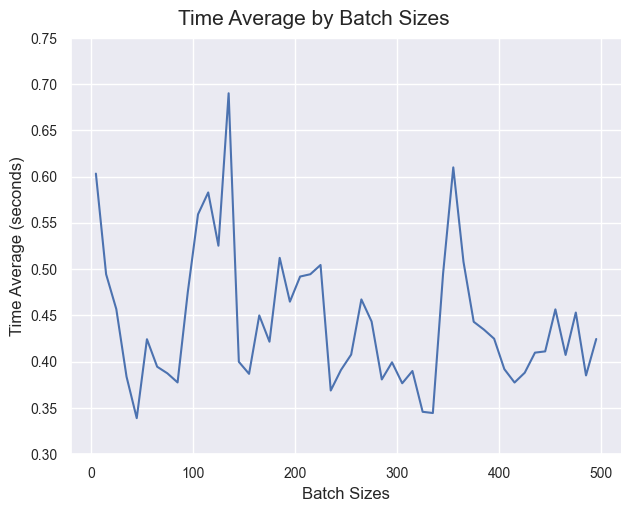

In [110]:
plot = sns.relplot(x=batch_sizes, y=avg_time_records, kind="line", errorbar=None, aspect=1.3)

plot.set_axis_labels("Batch Sizes", "Time Average (seconds)")
plot.fig.suptitle("Time Average by Batch Sizes", fontsize=15, y=1.02)
plot.axes.flat[0].set_xticks(plot.axes.flat[0].get_xticks()[1:-1])
plot.axes.flat[0].set_xticklabels(fontsize=10, labels=plot.axes.flat[0].get_xticklabels())
plot.axes.flat[0].set_yticks(plot.axes.flat[0].get_yticks())
plot.axes.flat[0].set_yticklabels(fontsize=10, labels=plot.axes.flat[0].get_yticklabels())
plt.show()

**Вывод:**

- Из графика зависимости среднего количества итераций от размера батча видно, что чем больше размер батча, тем меньше нам надо итераций, чтобы алгоритм сошёлся. При этом этот тренд ярко выражен при размерах батча меньше, чем 200, а дальше он гораздо менее выражен - из-за разброса значений. Это можно объяснить тем, что при маленьких размерах батча у нас очень мало информации, чтобы получить хорошую оценку для градиента.

- Из графика зависимости среднего времени обучения от размера батча видно, что для небольших значений размера батча (до 50) есть убывающий тренд, не очень сильно выраженный. Для бОльших размеров батча у нас стабильно большой разброс значений, среднее время меняется достаточно мало (при этом незначительно, но уменьшается). Это можно объяснить так: сначала мы долго обучаемся за счёт большого количества итераций, необходимых до сходимости, потом находим некоторый локальный минимум, где время перестаёт уменьшаться, а дальше мы снова можем обучаться относительно долго, так как итераций у нас меньше (см. график зависимости среднего количества итераций от размера батча), но каждая из них гораздо более затратная по количеству действий, чем итерация при, например, батче из одного объекта.   

- Таким образом, можно сделать следующий вывод про размеры батча: неоптимально брать совсем небольшие размеры (до 25), так как будем долго обучаться и сделаем много итераций, если размер больше - в целом для нас примерно одинаково, сколько мы берём, так как явной зависимости "больше размер => эффективнее обучение" у нас нет. При этом верно, что чем больше размер батча, тем оценка на градиент ближе к полному градиенту, но тем затратнее будут вычисления на одной итерации.

## Задание 7. Регуляризация (1 балл)

В этом задании вам предстоит исследовать влияние регуляризации на работу различных методов градиентного спуска. Напомним, регуляризация - это добавка к функции потерь, которая штрафует за норму весов. Мы будем использовать l2 регуляризацию, таким образом функция потерь приобретает следующий вид:

$$
    Q(w) = \dfrac{1}{\ell} \sum\limits_{i=1}^{\ell} (a_w(x_i) - y_i)^2 + \dfrac{\mu}{2} \| w \|^2
$$

Допишите класс **BaseDescentReg** в файле `descents.py`.

Протестируйте ваше решение в контесте.(У меня, к сожалению, доступа к нему нет)

Вставьте ссылку на успешную посылку:

* **BaseDescentReg**:

Найдите лучшие параметры обучения с регуляризацией аналогично 5 заданию. Будем подбирать длину шага $\lambda$ (`lambda_`) и коэффициент регуляризации $\mu$ (`mu`).

Сравните для каждого метода результаты с регуляризацией и без регуляризации (нужно опять сохранить ошибку и качество по метрике $R^2$ на обучающей и тестовой выборках и количество итераций до сходимости).

Постройте для каждого метода график со значениями функции потерь MSE с регуляризацией и без регуляризации (всего должно получиться 4 графика).

Посмотрите на получившиеся результаты. Какие можно сделать выводы, как регуляризация влияет на сходимость? Как изменилось качество на обучающей выборке? На тестовой? Чем вы можете объяснить это?

- **Полный градиентный спуск:**

Подберём наилучшие `lambda_` и `mu`:

In [111]:
lambdas = np.logspace(-7,0,num = 8)
mus = np.logspace(-3, 2, num=6)
best_lambda_full_reg = None
best_mu_full_reg = None
best_loss = 1e11

for lambda_ in lambdas:
    for mu in mus:
        descent_config = {
            'descent_name': 'full',
            'regularized': True,
            'kwargs': {
                'dimension': X_train.shape[1],
                'lambda_': lambda_,
                'mu': mu
            }
        }
        regression = LinearRegression(
                descent_config=descent_config
        )
        regression.fit(X_train, y_train)
        curr_loss = regression.calc_loss(X_val, y_val)
        print("lambda_: {0}, mu: {1}, loss: {2}".format(lambda_, mu, curr_loss))
        if curr_loss < best_loss:
            best_loss = curr_loss
            best_lambda_full_reg = lambda_
            best_mu_full_reg = mu


print()
print("best_lambda_ = {0}".format(best_lambda_full_reg))
print("best_mu = {0}".format(best_mu_full_reg))

lambda_: 1e-07, mu: 0.001, loss: 23.171961659227787
lambda_: 1e-07, mu: 0.01, loss: 27.12185131983189
lambda_: 1e-07, mu: 0.1, loss: 30.302842417960925
lambda_: 1e-07, mu: 1.0, loss: 29.69759359220644
lambda_: 1e-07, mu: 10.0, loss: 26.455176052550772
lambda_: 1e-07, mu: 100.0, loss: 22.091926393508786
lambda_: 1e-06, mu: 0.001, loss: 27.0377973284642
lambda_: 1e-06, mu: 0.01, loss: 23.80070902390248
lambda_: 1e-06, mu: 0.1, loss: 24.488258240948003
lambda_: 1e-06, mu: 1.0, loss: 30.419169043794533
lambda_: 1e-06, mu: 10.0, loss: 26.674208196389003
lambda_: 1e-06, mu: 100.0, loss: 29.38192807613493
lambda_: 1e-05, mu: 0.001, loss: 37.96174808735135
lambda_: 1e-05, mu: 0.01, loss: 31.141872472445737
lambda_: 1e-05, mu: 0.1, loss: 23.17539193988892
lambda_: 1e-05, mu: 1.0, loss: 22.606627469578406
lambda_: 1e-05, mu: 10.0, loss: 31.460956915460105
lambda_: 1e-05, mu: 100.0, loss: 24.394563262998
lambda_: 0.0001, mu: 0.001, loss: 24.927243587341227
lambda_: 0.0001, mu: 0.01, loss: 28.1523

d:\WORK ATTENTION!!!!(isn't all you need)\hw 3 grad descent\linear_regression.py:42: RuntimeWarning: overflow encountered in matmul
  if (weights_diff @ weights_diff) < self.tolerance:


lambda_: 1.0, mu: 100.0, loss: inf

best_lambda_ = 1.0
best_mu = 0.1


(Как и всегда до этого)Найдём loss на трейне (будем здесь за трейн считать объединение трейн и вал, чтобы у нас было больше данных) и на тесте, значение $R^2$ на тесте и кол-во итераций до сходимости при `best_lambda_` - для случаев без регуляризации и с регуляризацией:

In [112]:
descent_config = {
    'descent_name': 'full',
    'kwargs': {
        'dimension': X_train_val.shape[1],
        'lambda_': best_lambda_full
    }
}
regression = LinearRegression(
        descent_config=descent_config
)
regression.fit(X_train_val, y_train_val)

descent_config = {
    'descent_name': 'full',
    'regularized': True,
    'kwargs': {
        'dimension': X_train_val.shape[1],
        'lambda_': best_lambda_full_reg,
        'mu': best_mu_full_reg
    }
}
regression_reg = LinearRegression(
        descent_config=descent_config
)
regression_reg.fit(X_train_val, y_train_val)

print("Loss on Train (no Reg):", regression.calc_loss(X_train_val, y_train_val), "vs. Loss on Train (Reg):", regression_reg.calc_loss(X_train_val, y_train_val))
print("Loss on Test (no Reg):", regression.calc_loss(X_test, y_test), "vs. Loss on Test (Reg):", regression_reg.calc_loss(X_test, y_test))
print("R^2 on Test (no Reg):", r2_score(y_test, regression.predict(X_test)), "vs. R^2 on Test (Reg):", r2_score(y_test, regression_reg.predict(X_test)))
print("Iterations made until convergence (no Reg):", len(regression.loss_history) - 1, "vs. Iterations made until convergence (Reg):", len(regression_reg.loss_history) - 1)

Loss on Train (no Reg): 0.31657137934107804 vs. Loss on Train (Reg): 0.26969026707968274
Loss on Test (no Reg): 0.31922457540325855 vs. Loss on Test (Reg): 0.2667451837905594
R^2 on Test (no Reg): 0.7044521318327508 vs. R^2 on Test (Reg): 0.7530391564822607
Iterations made until convergence (no Reg): 48 vs. Iterations made until convergence (Reg): 180


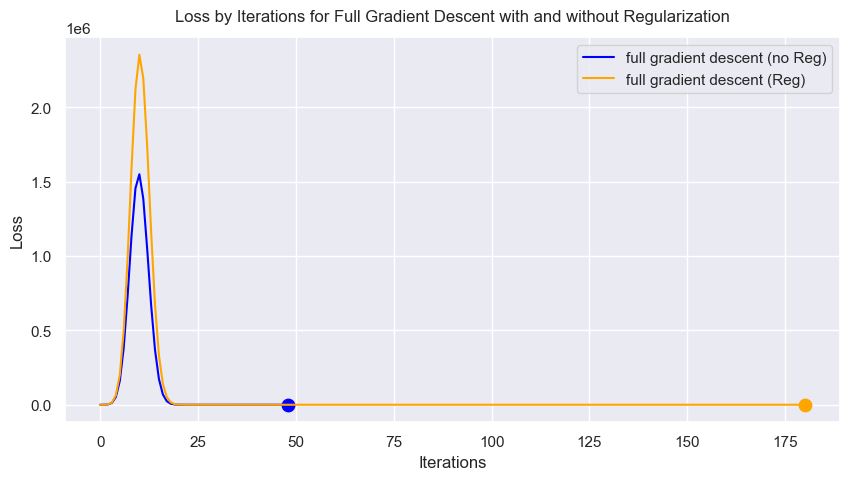

In [113]:
fig = plt.figure(figsize=[10, 5])
ax = fig.add_subplot(111)

ax.plot(np.arange(0, len(regression.loss_history)), regression.loss_history, label="full gradient descent (no Reg)", color="blue")
ax.scatter(len(regression.loss_history) - 1, regression.loss_history[-1], color="blue", s=80)
ax.plot(np.arange(0, len(regression_reg.loss_history)), regression_reg.loss_history, label="full gradient descent (Reg)", color="orange")
ax.scatter(len(regression_reg.loss_history) - 1, regression_reg.loss_history[-1], color="orange", s=80)

ax.set_xlabel("Iterations")
ax.set_ylabel("Loss")
ax.set_title("Loss by Iterations for Full Gradient Descent with and without Regularization", fontsize=12, y=1.02)
ax.legend()

plt.show()

- **Стохастический градиентный спуск:**

In [114]:
lambdas = np.logspace(-7, 0, num=8)
mus = np.logspace(-3, 1, num=5) # рассмотрим значения поменьше, чтобы не вызывать overflow на каждом шаге при больших mu
best_lambda_stochastic_reg = None
best_mu_stochastic_reg = None
best_loss = 1e11

for lambda_ in lambdas:
    for mu in mus:
        descent_config = {
            'descent_name': 'stochastic',
            'regularized': True,
            'kwargs': {
                'dimension': X_train.shape[1],
                'lambda_': lambda_,
                'mu': mu
            }
        }
        regression = LinearRegression(
                descent_config=descent_config
        )
        regression.fit(X_train, y_train)
        curr_loss = regression.calc_loss(X_val, y_val)
        print("lambda_: {0}, mu: {1}, loss: {2}".format(lambda_, mu, curr_loss))
        if curr_loss < best_loss:
            best_loss = curr_loss
            best_lambda_stochastic_reg = lambda_
            best_mu_stochastic_reg = mu


print()
print("best_lambda_ = {0}".format(best_lambda_stochastic_reg))
print("best_mu = {0}".format(best_mu_stochastic_reg))

lambda_: 1e-07, mu: 0.001, loss: 28.581480126464033
lambda_: 1e-07, mu: 0.01, loss: 27.655529840515502
lambda_: 1e-07, mu: 0.1, loss: 27.828265240157258
lambda_: 1e-07, mu: 1.0, loss: 29.79042855093303
lambda_: 1e-07, mu: 10.0, loss: 20.673322320800118
lambda_: 1e-06, mu: 0.001, loss: 26.86669974551064
lambda_: 1e-06, mu: 0.01, loss: 31.83194874314212
lambda_: 1e-06, mu: 0.1, loss: 35.18248756699289
lambda_: 1e-06, mu: 1.0, loss: 20.381163205715094
lambda_: 1e-06, mu: 10.0, loss: 30.94669833263918
lambda_: 1e-05, mu: 0.001, loss: 28.28399986279681
lambda_: 1e-05, mu: 0.01, loss: 25.122389134247577
lambda_: 1e-05, mu: 0.1, loss: 28.697891522184623
lambda_: 1e-05, mu: 1.0, loss: 27.277299298490856
lambda_: 1e-05, mu: 10.0, loss: 26.858196439946127
lambda_: 0.0001, mu: 0.001, loss: 26.49921720142818
lambda_: 0.0001, mu: 0.01, loss: 23.474120109650542
lambda_: 0.0001, mu: 0.1, loss: 21.941894709758746
lambda_: 0.0001, mu: 1.0, loss: 24.243796189644094
lambda_: 0.0001, mu: 10.0, loss: 25.47

In [115]:
descent_config = {
    'descent_name': 'stochastic',
    'kwargs': {
        'dimension': X_train_val.shape[1],
        'lambda_': best_lambda_stochastic
    }
}
regression = LinearRegression(
        descent_config=descent_config
)
regression.fit(X_train_val, y_train_val)

descent_config = {
    'descent_name': 'stochastic',
    'regularized': True,
    'kwargs': {
        'dimension': X_train_val.shape[1],
        'lambda_': best_lambda_stochastic_reg,
        'mu': best_mu_stochastic_reg
    }
}
regression_reg = LinearRegression(
        descent_config=descent_config
)
regression_reg.fit(X_train_val, y_train_val)

print("Loss on Train (no Reg):", regression.calc_loss(X_train_val, y_train_val), "vs. Loss on Train (Reg):", regression_reg.calc_loss(X_train_val, y_train_val))
print("Loss on Test (no Reg):", regression.calc_loss(X_test, y_test), "vs. Loss on Test (Reg):", regression_reg.calc_loss(X_test, y_test))
print("R^2 on Test (no Reg):", r2_score(y_test, regression.predict(X_test)), "vs. R^2 on Test (Reg):", r2_score(y_test, regression_reg.predict(X_test)))
print("Iterations made until convergence (no Reg):", len(regression.loss_history) - 1, "vs. Iterations made until convergence (Reg):", len(regression_reg.loss_history) - 1)

Loss on Train (no Reg): 0.5032720996101508 vs. Loss on Train (Reg): 0.3477817466751759
Loss on Test (no Reg): 0.5006299646741644 vs. Loss on Test (Reg): 0.3436035951158698
R^2 on Test (no Reg): 0.5365014782675024 vs. R^2 on Test (Reg): 0.6818812903022462
Iterations made until convergence (no Reg): 32 vs. Iterations made until convergence (Reg): 300


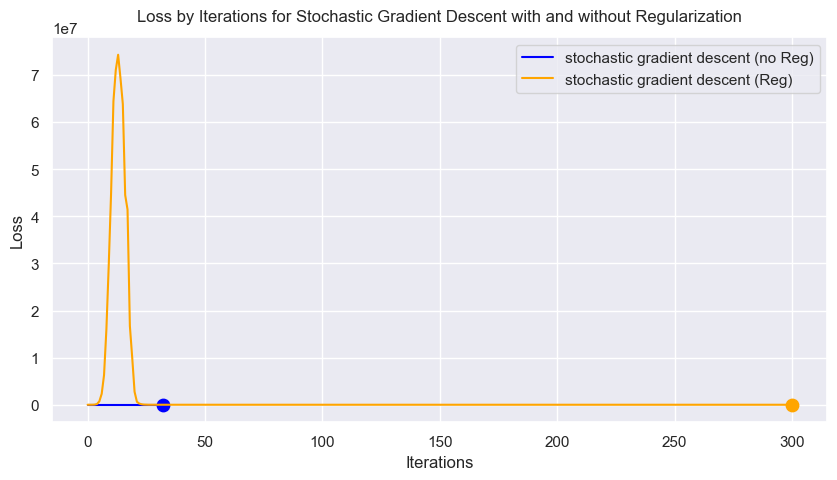

In [116]:
fig = plt.figure(figsize=[10, 5])
ax = fig.add_subplot(111)

ax.plot(np.arange(0, len(regression.loss_history)), regression.loss_history, label="stochastic gradient descent (no Reg)", color="blue")
ax.scatter(len(regression.loss_history) - 1, regression.loss_history[-1], color="blue", s=80)
ax.plot(np.arange(0, len(regression_reg.loss_history)), regression_reg.loss_history, label="stochastic gradient descent (Reg)", color="orange")
ax.scatter(len(regression_reg.loss_history) - 1, regression_reg.loss_history[-1], color="orange", s=80)

ax.set_xlabel("Iterations")
ax.set_ylabel("Loss")
ax.set_title("Loss by Iterations for Stochastic Gradient Descent with and without Regularization", fontsize=12, y=1.02)
ax.legend()

plt.show()

В целом понятно что да как, но думаю, что лучше будет посмотреть в лог-скейл.

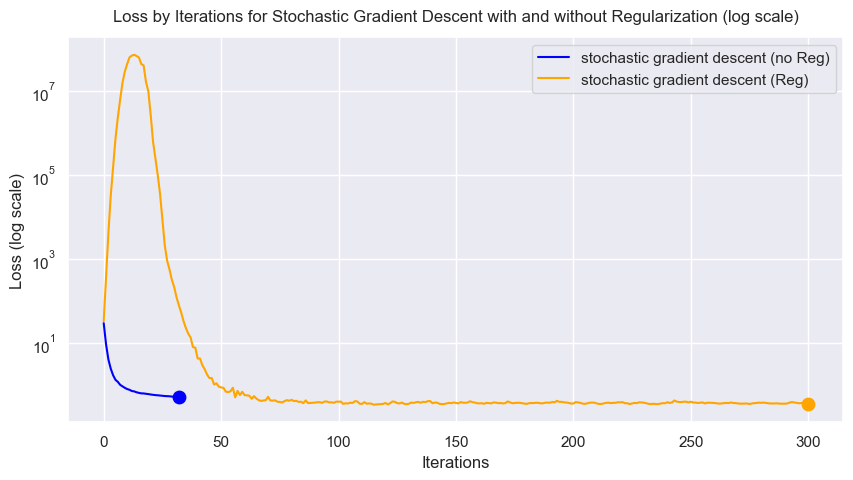

In [117]:
fig = plt.figure(figsize=[10, 5])
ax = fig.add_subplot(111)

ax.plot(np.arange(0, len(regression.loss_history)), regression.loss_history, label="stochastic gradient descent (no Reg)", color="blue")
ax.scatter(len(regression.loss_history) - 1, regression.loss_history[-1], color="blue", s=80)
ax.plot(np.arange(0, len(regression_reg.loss_history)), regression_reg.loss_history, label="stochastic gradient descent (Reg)", color="orange")
ax.scatter(len(regression_reg.loss_history) - 1, regression_reg.loss_history[-1], color="orange", s=80)

ax.set_xlabel("Iterations")
ax.set_ylabel("Loss (log scale)")
ax.set_title("Loss by Iterations for Stochastic Gradient Descent with and without Regularization (log scale)", fontsize=12, y=1.02)
ax.legend()
ax.set_yscale("log")

plt.show()

- **momentum gradient descent:**

In [118]:
lambdas = np.logspace(-7, 0, num=8)
mus = np.logspace(-3, 1, num=5) # рассмотрим значения поменьше, чтобы не вызывать overflow на каждом шаге при больших mu
best_lambda_momentum_reg = None
best_mu_momentum_reg = None
best_loss = 1e11

for lambda_ in lambdas:
    for mu in mus:
        descent_config = {
            'descent_name': 'momentum',
            'regularized': True,
            'kwargs': {
                'dimension': X_train.shape[1],
                'lambda_': lambda_,
                'mu': mu
            }
        }
        regression = LinearRegression(
                descent_config=descent_config
        )
        regression.fit(X_train, y_train)
        curr_loss = regression.calc_loss(X_val, y_val)
        print("lambda_: {0}, mu: {1}, loss: {2}".format(lambda_, mu, curr_loss))
        if curr_loss < best_loss:
            best_loss = curr_loss
            best_lambda_momentum_reg = lambda_
            best_mu_momentum_reg = mu


print()
print("best_lambda_ = {0}".format(best_lambda_momentum_reg))
print("best_mu = {0}".format(best_mu_momentum_reg))

lambda_: 1e-07, mu: 0.001, loss: 24.508118950525567
lambda_: 1e-07, mu: 0.01, loss: 24.49927178059115
lambda_: 1e-07, mu: 0.1, loss: 22.44309295747259
lambda_: 1e-07, mu: 1.0, loss: 31.113038646535653
lambda_: 1e-07, mu: 10.0, loss: 27.25866838535566
lambda_: 1e-06, mu: 0.001, loss: 27.876254339635818
lambda_: 1e-06, mu: 0.01, loss: 29.885075233913337
lambda_: 1e-06, mu: 0.1, loss: 22.29281319895451
lambda_: 1e-06, mu: 1.0, loss: 30.300048059219286
lambda_: 1e-06, mu: 10.0, loss: 27.555315534796154
lambda_: 1e-05, mu: 0.001, loss: 21.041180967783333
lambda_: 1e-05, mu: 0.01, loss: 21.662283002995544
lambda_: 1e-05, mu: 0.1, loss: 24.009514024893434
lambda_: 1e-05, mu: 1.0, loss: 26.03233471775402
lambda_: 1e-05, mu: 10.0, loss: 29.628038993918896
lambda_: 0.0001, mu: 0.001, loss: 28.11054399092826
lambda_: 0.0001, mu: 0.01, loss: 35.0524857889423
lambda_: 0.0001, mu: 0.1, loss: 31.364185278458404
lambda_: 0.0001, mu: 1.0, loss: 26.014610914661215
lambda_: 0.0001, mu: 10.0, loss: 33.267

In [119]:
descent_config = {
    'descent_name': 'momentum',
    'kwargs': {
        'dimension': X_train_val.shape[1],
        'lambda_': best_lambda_momentum
    }
}
regression = LinearRegression(
        descent_config=descent_config
)
regression.fit(X_train_val, y_train_val)

descent_config = {
    'descent_name': 'momentum',
    'regularized': True,
    'kwargs': {
        'dimension': X_train_val.shape[1],
        'lambda_': best_lambda_momentum_reg,
        'mu': best_mu_momentum_reg
    }
}
regression_reg = LinearRegression(
        descent_config=descent_config
)
regression_reg.fit(X_train_val, y_train_val)

print("Loss on Train (no Reg):", regression.calc_loss(X_train_val, y_train_val), "vs. Loss on Train (Reg):", regression_reg.calc_loss(X_train_val, y_train_val))
print("Loss on Test (no Reg):", regression.calc_loss(X_test, y_test), "vs. Loss on Test (Reg):", regression_reg.calc_loss(X_test, y_test))
print("R^2 on Test (no Reg):", r2_score(y_test, regression.predict(X_test)), "vs. R^2 on Test (Reg):", r2_score(y_test, regression_reg.predict(X_test)))
print("Iterations made until convergence (no Reg):", len(regression.loss_history) - 1, "vs. Iterations made until convergence (Reg):", len(regression_reg.loss_history) - 1)

Loss on Train (no Reg): 0.23920137795133065 vs. Loss on Train (Reg): 0.23465575072348754
Loss on Test (no Reg): 0.237167769832794 vs. Loss on Test (Reg): 0.2324722839265334
R^2 on Test (no Reg): 0.7804228302801665 vs. R^2 on Test (Reg): 0.7847700546373503
Iterations made until convergence (no Reg): 121 vs. Iterations made until convergence (Reg): 133


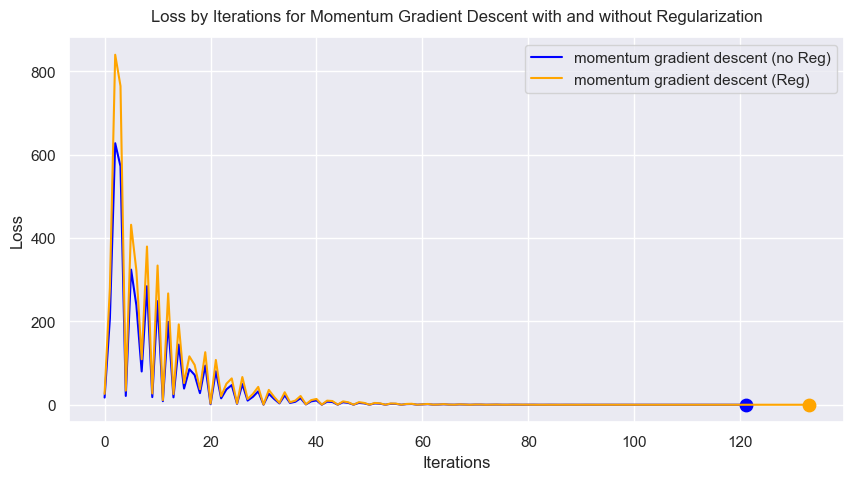

In [120]:
fig = plt.figure(figsize=[10, 5])
ax = fig.add_subplot(111)

ax.plot(np.arange(0, len(regression.loss_history)), regression.loss_history, label="momentum gradient descent (no Reg)", color="blue")
ax.scatter(len(regression.loss_history) - 1, regression.loss_history[-1], color="blue", s=80)
ax.plot(np.arange(0, len(regression_reg.loss_history)), regression_reg.loss_history, label="momentum gradient descent (Reg)", color="orange")
ax.scatter(len(regression_reg.loss_history) - 1, regression_reg.loss_history[-1], color="orange", s=80)

ax.set_xlabel("Iterations")
ax.set_ylabel("Loss")
ax.set_title("Loss by Iterations for Momentum Gradient Descent with and without Regularization", fontsize=12, y=1.02)
ax.legend()

plt.show()

- **Adam:**

In [121]:
lambdas = np.logspace(-7, 0, num=8)
mus = np.logspace(-3, 2, num=6)
best_lambda_adam_reg = None
best_mu_adam_reg = None
best_loss = 1e11

for lambda_ in lambdas:
    for mu in mus:
        descent_config = {
            'descent_name': 'adam',
            'regularized': True,
            'kwargs': {
                'dimension': X_train.shape[1],
                'lambda_': lambda_,
                'mu': mu
            }
        }
        regression = LinearRegression(
                descent_config=descent_config
        )
        regression.fit(X_train, y_train)
        curr_loss = regression.calc_loss(X_val, y_val)
        print("lambda_: {0}, mu: {1}, loss: {2}".format(lambda_, mu, curr_loss))
        if curr_loss < best_loss:
            best_loss = curr_loss
            best_lambda_adam_reg = lambda_
            best_mu_adam_reg = mu


print()
print("best_lambda_ = {0}".format(best_lambda_adam_reg))
print("best_mu = {0}".format(best_mu_adam_reg))

lambda_: 1e-07, mu: 0.001, loss: 22.055333754571475
lambda_: 1e-07, mu: 0.01, loss: 25.319287895686628
lambda_: 1e-07, mu: 0.1, loss: 31.27674136729234
lambda_: 1e-07, mu: 1.0, loss: 31.132928836963412
lambda_: 1e-07, mu: 10.0, loss: 37.0820967398719
lambda_: 1e-07, mu: 100.0, loss: 30.982628436695812
lambda_: 1e-06, mu: 0.001, loss: 31.10782732307317
lambda_: 1e-06, mu: 0.01, loss: 31.883138237598384
lambda_: 1e-06, mu: 0.1, loss: 29.1542250495043
lambda_: 1e-06, mu: 1.0, loss: 28.30012341637481
lambda_: 1e-06, mu: 10.0, loss: 14.848927858338651
lambda_: 1e-06, mu: 100.0, loss: 26.967032038321406
lambda_: 1e-05, mu: 0.001, loss: 26.264693568944757
lambda_: 1e-05, mu: 0.01, loss: 18.534527417723893
lambda_: 1e-05, mu: 0.1, loss: 16.959240069056072
lambda_: 1e-05, mu: 1.0, loss: 19.008066610527305
lambda_: 1e-05, mu: 10.0, loss: 27.218126191988265
lambda_: 1e-05, mu: 100.0, loss: 30.58543230308929
lambda_: 0.0001, mu: 0.001, loss: 23.97764019230443
lambda_: 0.0001, mu: 0.01, loss: 26.32

In [122]:
descent_config = {
    'descent_name': 'adam',
    'kwargs': {
        'dimension': X_train_val.shape[1],
        'lambda_': best_lambda_adam
    }
}
regression = LinearRegression(
        descent_config=descent_config
)
regression.fit(X_train_val, y_train_val)

descent_config = {
    'descent_name': 'adam',
    'regularized': True,
    'kwargs': {
        'dimension': X_train_val.shape[1],
        'lambda_': best_lambda_adam_reg,
        'mu': best_mu_adam_reg
    }
}
regression_reg = LinearRegression(
        descent_config=descent_config
)
regression_reg.fit(X_train_val, y_train_val)

print("Loss on Train (no Reg):", regression.calc_loss(X_train_val, y_train_val), "vs. Loss on Train (Reg):", regression_reg.calc_loss(X_train_val, y_train_val))
print("Loss on Test (no Reg):", regression.calc_loss(X_test, y_test), "vs. Loss on Test (Reg):", regression_reg.calc_loss(X_test, y_test))
print("R^2 on Test (no Reg):", r2_score(y_test, regression.predict(X_test)), "vs. R^2 on Test (Reg):", r2_score(y_test, regression_reg.predict(X_test)))
print("Iterations made until convergence (no Reg):", len(regression.loss_history) - 1, "vs. Iterations made until convergence (Reg):", len(regression_reg.loss_history) - 1)

Loss on Train (no Reg): 0.22226906486968318 vs. Loss on Train (Reg): 0.2270002894563446
Loss on Test (no Reg): 0.21983720285064318 vs. Loss on Test (Reg): 0.22438806564091804
R^2 on Test (no Reg): 0.7964679988554055 vs. R^2 on Test (Reg): 0.7922546709990264
Iterations made until convergence (no Reg): 194 vs. Iterations made until convergence (Reg): 300


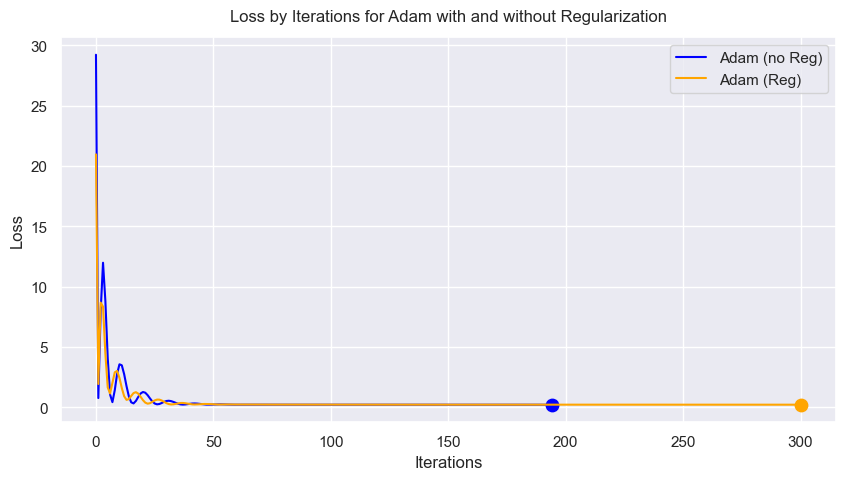

In [123]:
fig = plt.figure(figsize=[10, 5])
ax = fig.add_subplot(111)

ax.plot(np.arange(0, len(regression.loss_history)), regression.loss_history, label="Adam (no Reg)", color="blue")
ax.scatter(len(regression.loss_history) - 1, regression.loss_history[-1], color="blue", s=80)
ax.plot(np.arange(0, len(regression_reg.loss_history)), regression_reg.loss_history, label="Adam (Reg)", color="orange")
ax.scatter(len(regression_reg.loss_history) - 1, regression_reg.loss_history[-1], color="orange", s=80)

ax.set_xlabel("Iterations")
ax.set_ylabel("Loss")
ax.set_title("Loss by Iterations for Adam with and without Regularization", fontsize=12, y=1.02)
ax.legend()

plt.show()

Спустя миллион одинаковых строк кода... пришло время сделать **Выводы:**

**Выводы:**
- Для всех методов, за исключением Adam, лосс на трейне и на тесте при регуляризации уменьшается по сравнению с лоссом для соответствующих методов без регуляризации; $R^2$ на тесте, соответственно, тоже увеличивается для всех методов, кроме Adam, когда регуляризация есть, - по сравнению с тем, когда её нет. Таким образом, для всех методов, кроме Adam, качество модели с регуляризацией лучше, чем модели без регуляризации.

- Для Adam метрики показывают, что качество модели лучше, когда регуляризации нет, чем когда она есть.

- При этом для всех этих методов верно, что, когда регуляризация есть, итераций становится больше, чем когда её нет => обучение с регуляризацией в среднем будет дольше.

- За исключением Adam, чем метод "нестабильнее" (считаем, что самый "нестабильный"  - стохастический градиентный спуск, так как использует не всю информацию из признаков и так как в данном методе не используются дополнительные идеи для повышения "стабильности"; далее - полный градиентный спуск, так как он уже использует всю имеющуюся информацию о признаках, но не использует доп идеи для повышения "стабильности"; далее идёт momentum gradient descent, так как в нём используется идея о накапливании градиентов, что делает результат "стабильнее"; вообще говоря, самый "стабильный" из перечисленных методов - Adam, так как использует идею адаптивного спуска для разных компонент вектора весов, что в среднем ещё сильнее уменьшает осцилляции при обучении, но в данном выводе его не учитываем), тем больше разность по модулю значения метрики метода с регуляризацией и значения метрики того же метода без неё и разность по модулю между количеством итераций до сходимости метода с регуляризацией и количеством итераций до сходимости метода без неё.

- Эти выводы можно объяснить так: при добавлении штрафа за регуляризацию мы "сбиваем" значения наших градиентов (сдвигаем его на вектор весов, умноженный на `mu`), из-за чего модель с одной стороны меньше переобучается, с другой же стороны дольше обучается, так как она движется не в наиболее оптимальном с точки зрения оригинального лосса (без регуляризации) направлении. Для Adam с регуляризацией получили из-за этого же результат по метрикам хуже, чем для Adam без неё (и разность по итерациям для этих методов - маленькую) - с учётом данной гипотезы Adam просто не хватило ещё итераций для полноценного обучения (алгоритм на самом деле не сошёлся), так как мы принудительно останавливаем спуск, когда изменения вектора весов достаточно малы с нашей точки зрения (критерий останова с tolerance).

## Задание 8. Альтернативная функция потерь (1 балл)

В этом задании вам предстоит использовать другую функцию потерь для нашей задачи регрессии. В качестве функции потерь мы выбрали **Log-Cosh**:

$$
    L(y, a)
    =
    \log\left(\cosh(a - y)\right).
$$

Самостоятельно продифференцируйте данную функцию потерь чтобы найти её градиент:

$$
    L(y, a)' = (\log\left(\cosh(a - y)\right)' = x \cdot \frac{\sinh(a-y)}{\cosh(a-y)} = x \cdot \tanh(a-y)
$$

Программно реализуйте градиентный спуск с данной функцией потерь в файле `descents.py`, обучите все четыре метода (без регуляризации) аналогично 5 заданию, сравните их качество с четырьмя методами из 5 задания.

Пример того, как можно запрограммировать использование нескольких функций потерь внутри одного класса градиентного спуска:


```python
from enum import auto
from enum import Enum

import numpy as np

class LossFunction(Enum):
    MSE = auto()
    MAE = auto()
    LogCosh = auto()
    Huber = auto()

...
class BaseDescent:
    def __init__(self, loss_function: LossFunction = LossFunction.MSE):
        self.loss_function: LossFunction = loss_function

    def calc_gradient(self, x: np.ndarray, y: np.ndarray) -> np.ndarray:
        if self.loss_function is LossFunction.MSE:
            return ...
        elif self.loss_function is LossFunction.LogCosh:
            return ...
...

```

In [124]:
print("Baseline Log_Cosh:")
print(1 / y_val.shape[0] * np.log(np.cosh([y.mean()] * y_val.shape[0] - y_val)).sum())

Baseline Log_Cosh:
0.4138140224007957


In [125]:
from descents import LossFunction
def get_log_cosh_lr(learn_rate, descent_n):
    descent_config = {
        'descent_name': descent_n,
        'kwargs': {
            'dimension': x.shape[1],
            'lambda_': learn_rate,
            'loss_function': LossFunction.LogCosh
        }
    }

    regression = LinearRegression(
        descent_config=descent_config
    )

    regression.fit(X_train, y_train)
    return regression.calc_loss(X_val, y_val)


descents = ['full', 'stochastic', 'momentum', 'adam']
search_results_cosh = {}
for descent in descents:
    best_lr = 0
    best_loss = 1e8
    for lr in np.logspace(-5, 1, 10):
        print(f'{descent} descent with lr={lr}... ')
        loss = get_log_cosh_lr(lr, descent)
        print(f'loss={loss}\n')
        if loss < best_loss:
            best_loss = loss
            best_lr = lr
    search_results_cosh[descent] = {
        'best_lr': best_lr,
        'lr_loss': best_loss
    }

full descent with lr=1e-05... 
loss=22.254417088045336

full descent with lr=4.641588833612782e-05... 
loss=24.714007497892624

full descent with lr=0.00021544346900318823... 
loss=24.436915594828776

full descent with lr=0.001... 
loss=18.10702151902399

full descent with lr=0.004641588833612777... 
loss=15.6071714334559

full descent with lr=0.021544346900318822... 
loss=1.6166838242889532

full descent with lr=0.1... 
loss=0.5753236041105618

full descent with lr=0.46415888336127725... 
loss=0.3862206455085646

full descent with lr=2.154434690031882... 
loss=56.870232643084776

full descent with lr=10.0... 


d:\WORK ATTENTION!!!!(isn't all you need)\hw 3 grad descent\linear_regression.py:42: RuntimeWarning: overflow encountered in matmul
  if (weights_diff @ weights_diff) < self.tolerance:


loss=inf

stochastic descent with lr=1e-05... 
loss=26.278242538220823

stochastic descent with lr=4.641588833612782e-05... 
loss=18.648671560614126

stochastic descent with lr=0.00021544346900318823... 
loss=21.5017815781707

stochastic descent with lr=0.001... 
loss=19.525183709760128

stochastic descent with lr=0.004641588833612777... 
loss=18.842370164469703

stochastic descent with lr=0.021544346900318822... 
loss=1.7086441330597877

stochastic descent with lr=0.1... 
loss=0.5835968923783494

stochastic descent with lr=0.46415888336127725... 
loss=0.32583143320337943

stochastic descent with lr=2.154434690031882... 
loss=6.495346966215754e+28

stochastic descent with lr=10.0... 


d:\WORK ATTENTION!!!!(isn't all you need)\hw 3 grad descent\linear_regression.py:42: RuntimeWarning: overflow encountered in matmul
  if (weights_diff @ weights_diff) < self.tolerance:
d:\WORK ATTENTION!!!!(isn't all you need)\hw 3 grad descent\linear_regression.py:42: RuntimeWarning: overflow encountered in matmul
  if (weights_diff @ weights_diff) < self.tolerance:
d:\WORK ATTENTION!!!!(isn't all you need)\hw 3 grad descent\linear_regression.py:42: RuntimeWarning: overflow encountered in matmul
  if (weights_diff @ weights_diff) < self.tolerance:
d:\WORK ATTENTION!!!!(isn't all you need)\hw 3 grad descent\linear_regression.py:42: RuntimeWarning: overflow encountered in matmul
  if (weights_diff @ weights_diff) < self.tolerance:
d:\WORK ATTENTION!!!!(isn't all you need)\hw 3 grad descent\linear_regression.py:42: RuntimeWarning: overflow encountered in matmul
  if (weights_diff @ weights_diff) < self.tolerance:
d:\WORK ATTENTION!!!!(isn't all you need)\hw 3 grad descent\linear_regressi

loss=inf

momentum descent with lr=1e-05... 
loss=19.244895855452768

momentum descent with lr=4.641588833612782e-05... 
loss=26.917933802369372

momentum descent with lr=0.00021544346900318823... 
loss=25.479694323745633

momentum descent with lr=0.001... 
loss=4.8443496308169784

momentum descent with lr=0.004641588833612777... 
loss=0.692034195176372

momentum descent with lr=0.021544346900318822... 
loss=0.7008901876111641

momentum descent with lr=0.1... 
loss=0.3282066710514849

momentum descent with lr=0.46415888336127725... 
loss=0.25851374500578567

momentum descent with lr=2.154434690031882... 
loss=7.653261278229848

momentum descent with lr=10.0... 
loss=inf

adam descent with lr=1e-05... 
loss=34.4309510943185

adam descent with lr=4.641588833612782e-05... 
loss=30.553439659236822

adam descent with lr=0.00021544346900318823... 
loss=32.791502696931296

adam descent with lr=0.001... 
loss=18.57943252026314

adam descent with lr=0.004641588833612777... 
loss=27.106532230522

In [128]:
from sklearn.metrics import mean_squared_error

In [130]:
def get_metrics_cosh(learn_rate, descent_n):
    descent_config = {
        'descent_name': descent_n,
        'kwargs': {
            'dimension': x.shape[1],
            'lambda_': learn_rate,
            'loss_function': LossFunction.LogCosh
        }
    }

    regression = LinearRegression(
        descent_config=descent_config
    )

    regression.fit(X_train, y_train)
    y_test_pred = regression.predict(X_test)
    y_train_pred = regression.predict(X_train)
    return {'train mse': mean_squared_error(y_train_pred, y_train, squared=True),
            'test mse': mean_squared_error(y_test_pred, y_test, squared=True),
            'train log-cosh': regression.calc_loss(X_train, y_train),
            'test log-cosh': regression.calc_loss(X_test, y_test),
            'test r2': r2_score(y_test, y_test_pred),
            'iter before convergence': len(regression.loss_history)}

r2_metrics_cosh = {}
for descent in search_results_cosh.keys():
    r2_metrics_cosh[descent] = get_metrics_cosh(search_results_cosh[descent]['best_lr'], descent)

In [131]:
pd.DataFrame(r2_metrics_cosh)

,full,stochastic,momentum,adam
train mse,0.372003,0.313140,0.256413,0.221531
test mse,0.367654,0.310041,0.251386,0.218619
train log-cosh,0.372003,0.313140,0.256413,0.221531
test log-cosh,0.367654,0.310041,0.251386,0.218619
test r2,0.659615,0.712955,0.767259,0.797596
iter before convergence,34.000000,170.000000,105.000000,169.000000


Количество итераций до сходимости увеличилось у полного и стохастического, хотя у полного с моментом осталось таким же. R2 метрики стали лучше у всех методов кроме adam. Точно так же у всех кроме него достаточно сильно уменьшилась ошибка MSE (хотя мы минимизировали по log-cosh)

### Кулинарно-социализационный бонус. (0.5 балла).

Как мы знаем, осень прекрасная пора, время пробовать новое и делиться теплом с друзьями и близкими. Выберите рецепт, который соответствует вашему настроению, приготовьте выбранное блюдо и угостите хотя бы одного человека им. Кратко опишите ваши впечатления, прикрепите рецепт и фотографии блюда и довольного гостя.

Живу в общаге => готовить лень. Т.к. я из Волгограда, то очень сильно люблю наши котлеты по-киевски. В Москве таких вкусных, к сожалению, не найти

### Бонус 1. Другие методы градиентного спуска (1 балл).

По желанию выберите метод градиентного спуска из следующего списка и самостоятельно реализуйте его в файле `descents.py`. Обучите линейную регрессию с помощью этого метода, сравните с методами из основной части домашнего задания.

`AdaMax` (вариация Adam основанная на $l_{\infty}$), `Nadam` (вариация Adam совмещенная с методом импульса Нестерова), `AMSGrad` (ещё одна вариация Adam).

### Бонус 2. Другие функции потерь (1 балл).

Аналогично 8 заданию реализуйте две функции потерь - **MAE** и **Huber**.

Самостоятельно продифференцируйте данные функции потерь, чтобы найти их градиенты:

`### ваше решение тут ###`

Программно реализуйте градиентный спуск с данными функциями потерь в файле `descents.py`, обучите все четыре метода (без регуляризации) аналогично 5 заданию, сравните их качество с четырьмя методами из 5 задания.

Сравните между собой *для каждого метода отдельно* качество для разных функций потерь. Какая оказалась лучше? Как вы думаете почему?

In [ ]:
# YOUR CODE: